In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Ananth\\Downloads\\Capstone Project - 1\\correct Capstone Project - 1'

In [5]:
df = pd.read_csv('hotel_bookings.csv')

In [6]:
pd.options.display.max_columns = None

In [7]:
df.head()

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_customer,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
0,type_2,0,24-07-2017,01-07-2018,0,0,2,0,Only Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0
1,type_2,0,24-06-2016,01-07-2018,0,0,2,0,Only Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0
2,type_2,0,24-06-2018,01-07-2018,0,1,1,0,Only Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,0,0
3,type_2,0,18-06-2018,01-07-2018,0,1,1,0,Only Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,0,0
4,type_2,0,17-06-2018,01-07-2018,0,2,2,0,Only Breakfast,GBR,Online Travel Agents,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1


In [8]:
df.describe(include = 'all')

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_customer,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
count,119390,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000
unique,2,NaN,985,792,NaN,NaN,NaN,NaN,4,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN
top,type_1,NaN,17-10-2017,05-12-2018,NaN,NaN,NaN,NaN,Only Breakfast,PRT,Online Travel Agents,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN
freq,79330,NaN,2511,448,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN
mean,NaN,0.370416,NaN,NaN,0.927599,2.500302,1.856403,0.111835,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,0.062518,0.571363
std,NaN,0.482918,NaN,NaN,0.998613,1.908286,0.579261,0.412561,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,0.245291,0.792798
min,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,NaN,NaN,1.000000,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,NaN,NaN,2.000000,3.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,0.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   booking_date                    119390 non-null  object 
 3   arrival_date                    119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_cust

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
booking_date                           0
arrival_date                           0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_customer                   0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
required_car_parking_spaces            0
totalno_of_speci

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

hotel                              0.000000
is_canceled                        0.000000
booking_date                       0.000000
arrival_date                       0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_customer               0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                           94.306893
days_in_waiting_list               0.000000
customer_type                   

In [12]:
### The column company can be dropped as there are more than 20% missing values:

In [13]:
df = df.drop(['company'], axis = 1)

In [14]:
df["agent"].replace(np.nan, df["agent"].median(), inplace = True)

In [15]:
df["country"] = df["country"].fillna(df["country"].mode().iloc[0])

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
booking_date                      0
arrival_date                      0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_customer              0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
totalno_of_special_requests       0
dtype: int64

#### Let us start by analyzing each and every variable and their response to the target variable:

In [17]:
df.hotel.value_counts()

type_1    79330
type_2    40060
Name: hotel, dtype: int64

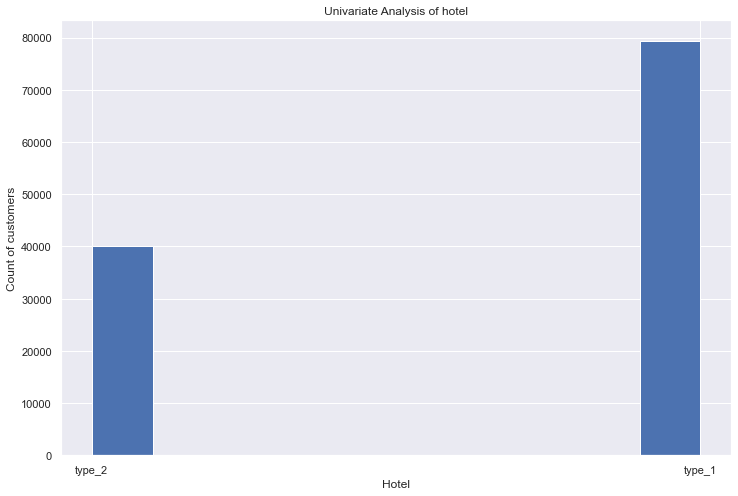

In [18]:
plt.figure(figsize = (12,8))
plt.hist(df['hotel'])
plt.title('Univariate Analysis of hotel')
plt.xlabel('Hotel')
plt.ylabel('Count of customers')
plt.show()

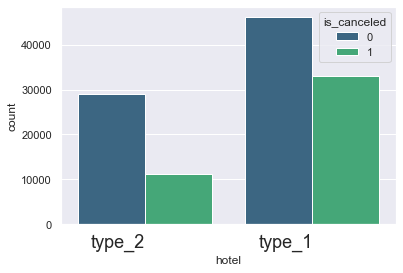

In [19]:
chart=sns.countplot(x="hotel", hue="is_canceled", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontsize=18)
chart;

In [20]:
df.is_canceled.value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [21]:
### Usually if the proportion in the target variable is 60 - 40 then we conclude that the target variable is balanced. 
### In this case it is close to the above said proportion, however we shall try SMOTE and see if the model performance imporves
### at a later stage:

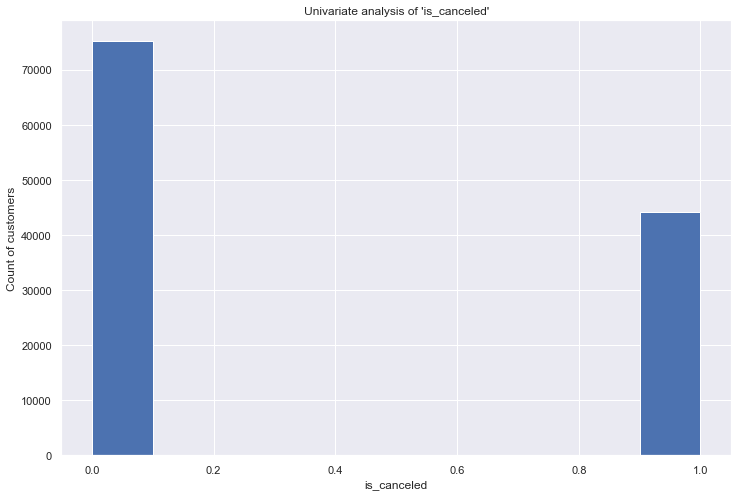

In [22]:
plt.figure(figsize = (12,8))
plt.hist(df['is_canceled'])
plt.title("Univariate analysis of 'is_canceled'")
plt.xlabel('is_canceled')
plt.ylabel('Count of customers')
plt.show()

In [23]:
df.booking_date.value_counts()

17-10-2017    2511
09-07-2018     874
02-10-2018     832
06-07-2018     777
07-07-2018     633
              ... 
13-08-2017       1
21-06-2018       1
06-10-2017       1
07-09-2017       1
18-04-2017       1
Name: booking_date, Length: 985, dtype: int64

In [24]:
df['booking_date'] = pd.to_datetime(df['booking_date'], infer_datetime_format = True)

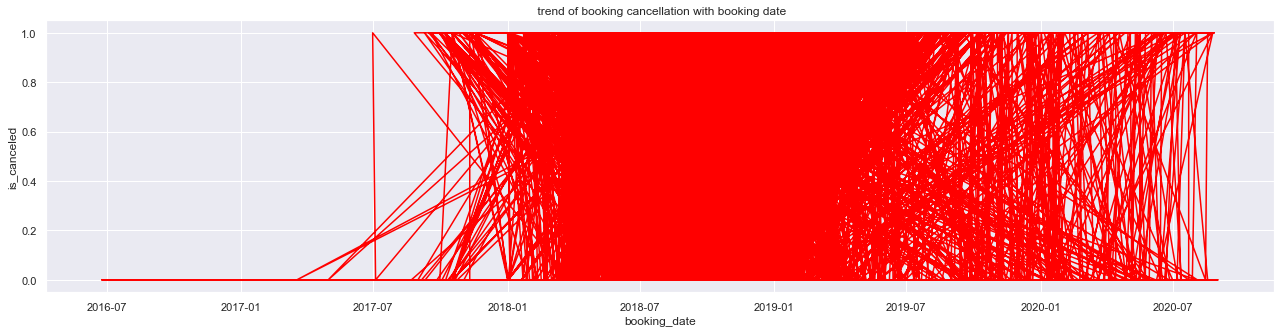

In [25]:
plt.figure(figsize = (22,5))
plt.plot(df['booking_date'], df['is_canceled'], color = 'red')
plt.xlabel('booking_date')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with booking date")
plt.show()

In [26]:
### Let us now extract year and month of booking and place them as a separate column
df['booking_year'] = pd.DatetimeIndex(df['booking_date']).year
df['booking_year'].head()

0    2017
1    2016
2    2018
3    2018
4    2018
Name: booking_year, dtype: int64

(array([1.0000e+00, 0.0000e+00, 2.6360e+03, 0.0000e+00, 0.0000e+00,
        3.1711e+04, 0.0000e+00, 5.8437e+04, 0.0000e+00, 2.6605e+04]),
 array([2016. , 2016.4, 2016.8, 2017.2, 2017.6, 2018. , 2018.4, 2018.8,
        2019.2, 2019.6, 2020. ]),
 <BarContainer object of 10 artists>)

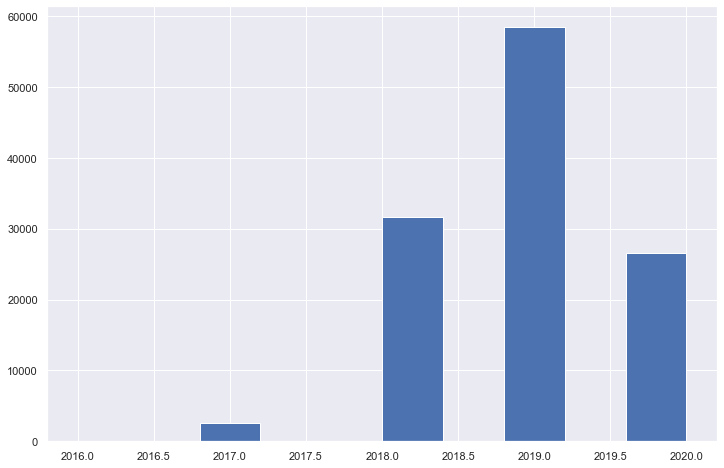

In [27]:
plt.figure(figsize = (12,8))
plt.hist(df['booking_year'])

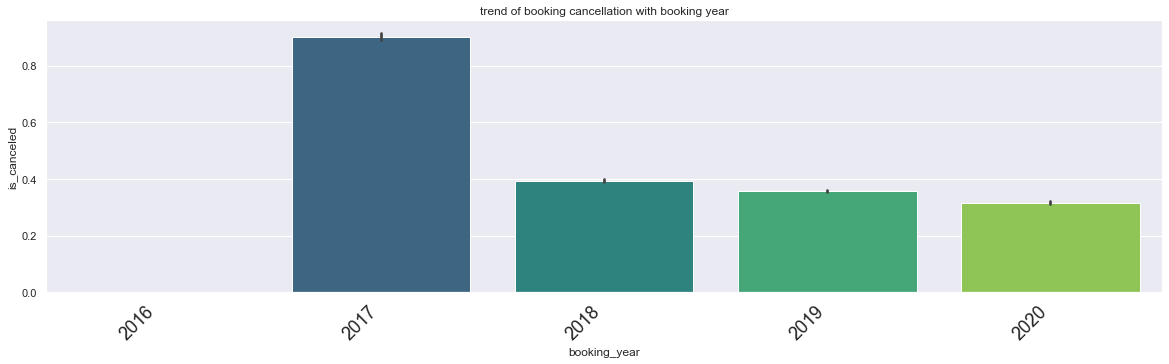

In [28]:
plt.figure(figsize=(20,5))

chart=sns.barplot(x="booking_year", y="is_canceled", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('trend of booking cancellation with booking year')
chart;

In [29]:
df['booking_month'] = pd.DatetimeIndex(df['booking_date']).month
df['booking_month'].head()

0    7
1    6
2    6
3    6
4    6
Name: booking_month, dtype: int64

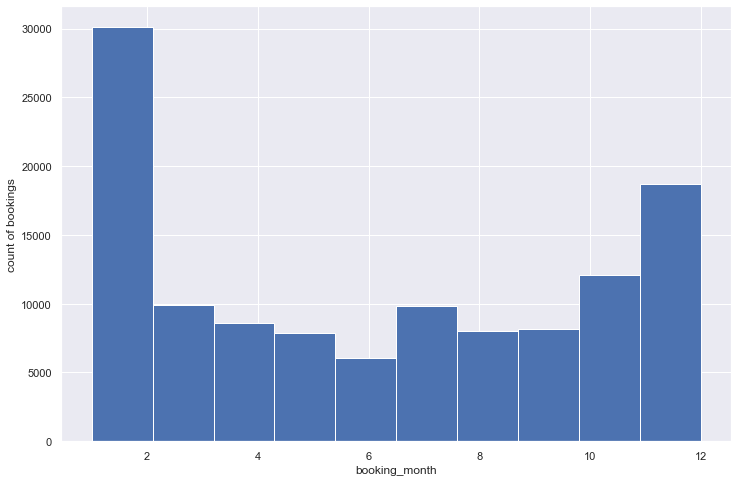

In [30]:
plt.figure(figsize = (12,8))
plt.hist(df['booking_month'])
plt.xlabel('booking_month')
plt.ylabel('count of bookings')
plt.show()

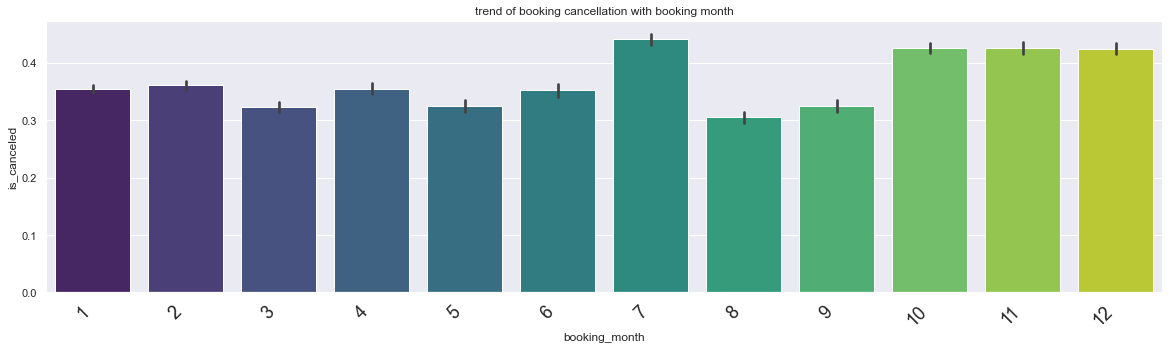

In [31]:
plt.figure(figsize=(20,5))

chart=sns.barplot(x="booking_month", y="is_canceled", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('trend of booking cancellation with booking month')
chart;

In [32]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], infer_datetime_format = True)

In [33]:
df['arrival_year'] = pd.DatetimeIndex(df['arrival_date']).year
df['arrival_month'] = pd.DatetimeIndex(df['arrival_date']).month

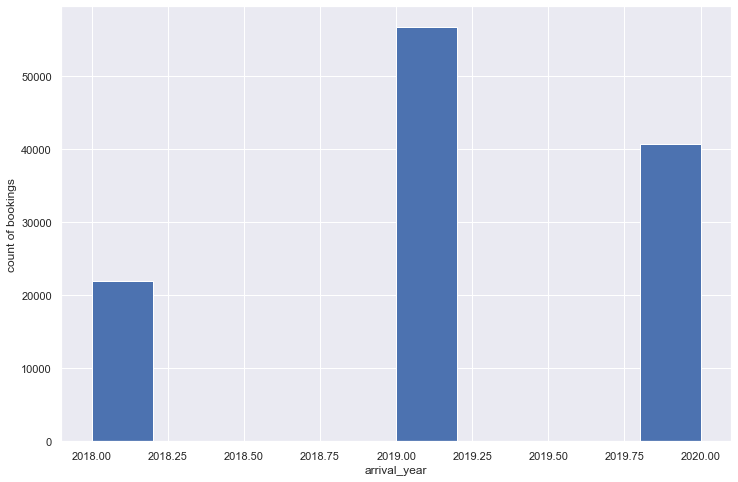

In [34]:
plt.figure(figsize = (12,8))
plt.hist(df['arrival_year'])
plt.xlabel('arrival_year')
plt.ylabel('count of bookings')
plt.show()

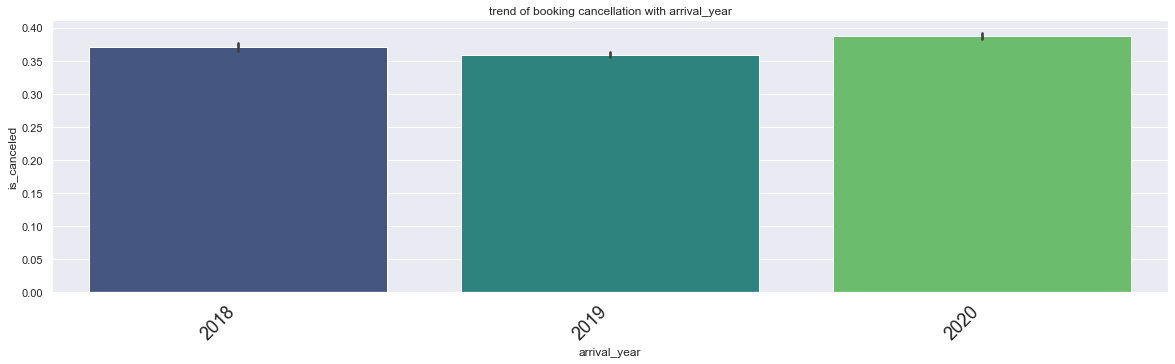

In [35]:
plt.figure(figsize=(20,5))

chart=sns.barplot(x="arrival_year", y="is_canceled", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('trend of booking cancellation with arrival_year')
chart;

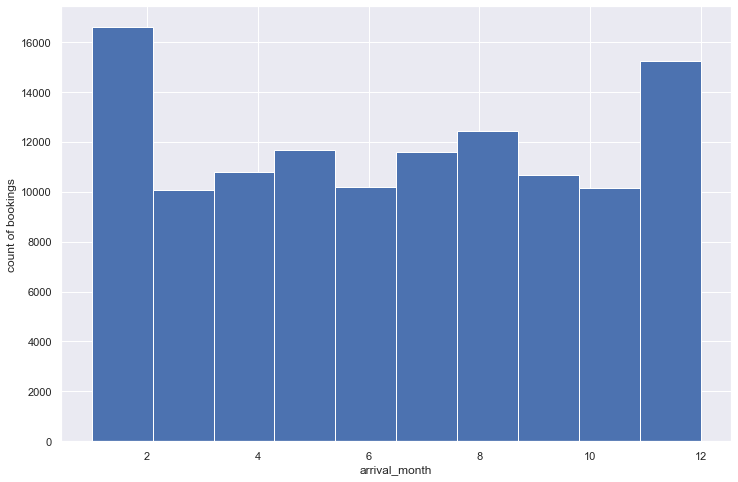

In [36]:
plt.figure(figsize = (12,8))
plt.hist(df['arrival_month'])
plt.xlabel('arrival_month')
plt.ylabel('count of bookings')
plt.show()

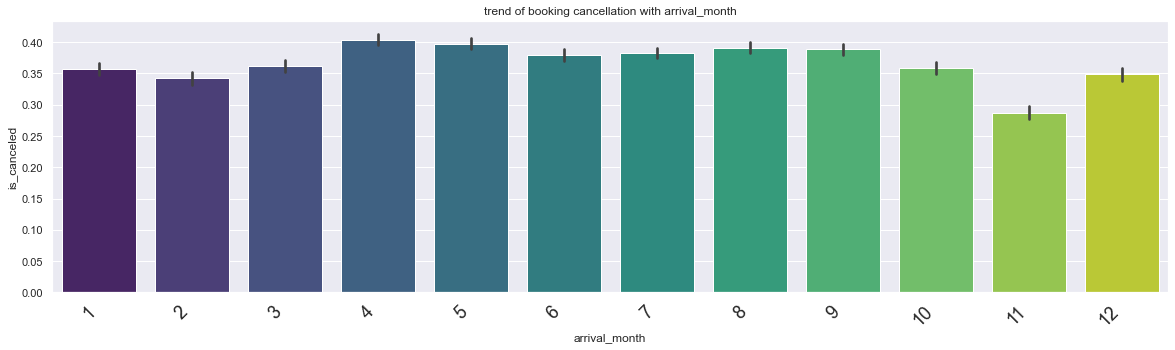

In [37]:
plt.figure(figsize=(20,5))

chart=sns.barplot(x="arrival_month", y="is_canceled", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('trend of booking cancellation with arrival_month')
chart;

In [38]:
df['Waiting_days'] = (df['arrival_date'] - df['booking_date']).dt.days.abs()

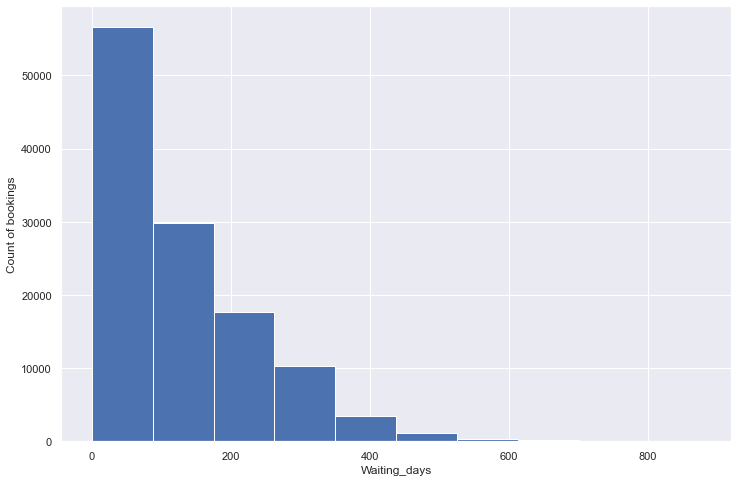

In [39]:
plt.figure(figsize = (12,8))
plt.hist(df['Waiting_days'])
plt.xlabel('Waiting_days')
plt.ylabel('Count of bookings')
plt.show()

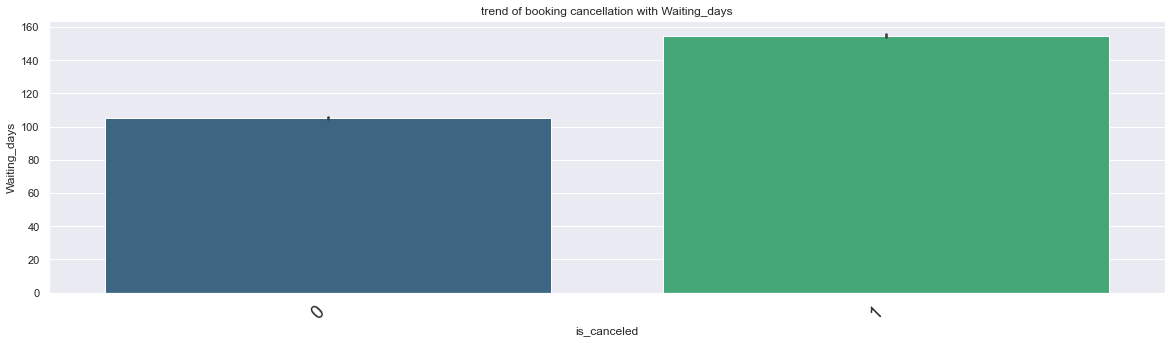

In [40]:
plt.figure(figsize=(20,5))

chart=sns.barplot(x="is_canceled", y="Waiting_days", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('trend of booking cancellation with Waiting_days')
chart;

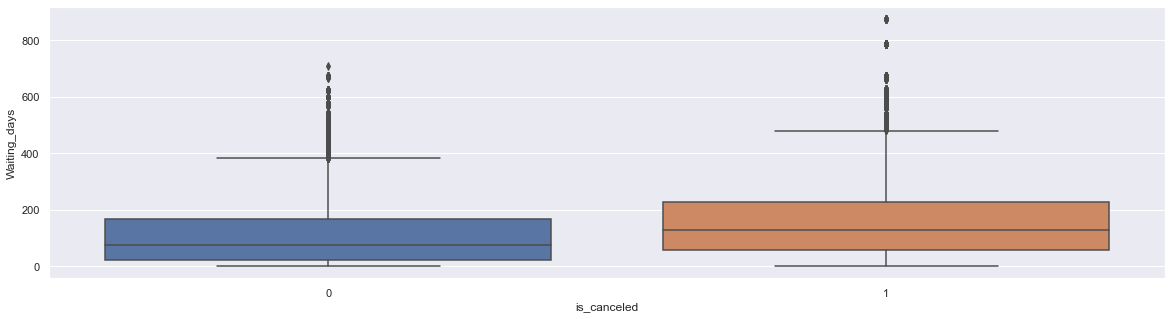

In [41]:
plt.figure(figsize=(20,5))

sns.boxplot(x = 'is_canceled', y = 'Waiting_days', data = df)
plt.show()

In [42]:
df['Waiting_days'].describe()

count    119390.000000
mean        123.517481
std         112.167496
min           0.000000
25%          31.000000
50%          95.000000
75%         187.000000
max         876.000000
Name: Waiting_days, dtype: float64

In [43]:
df['Waiting_days'].value_counts()

0      4180
1      2236
2      1445
4      1304
3      1258
       ... 
505       1
528       1
526       1
523       1
511       1
Name: Waiting_days, Length: 546, dtype: int64

In [44]:
df.Waiting_days.describe()

count    119390.000000
mean        123.517481
std         112.167496
min           0.000000
25%          31.000000
50%          95.000000
75%         187.000000
max         876.000000
Name: Waiting_days, dtype: float64

In [45]:
df['Waiting_days_bins'] = pd.cut(df['Waiting_days'], [-np.inf,0,7,35,60,90,120,150,180,270,876, np.inf], labels = False, right = False)

In [46]:
df['Waiting_days_bins'].value_counts()

2     19095
8     17785
9     13954
4     13171
3     12687
1     12630
5     11573
6      9429
7      9049
10       17
Name: Waiting_days_bins, dtype: int64

In [47]:
df['Waiting_days_bins'].isnull().sum()

0

(array([1.2630e+04, 1.9095e+04, 1.2687e+04, 1.3171e+04, 1.1573e+04,
        9.4290e+03, 9.0490e+03, 1.7785e+04, 1.3954e+04, 1.7000e+01]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

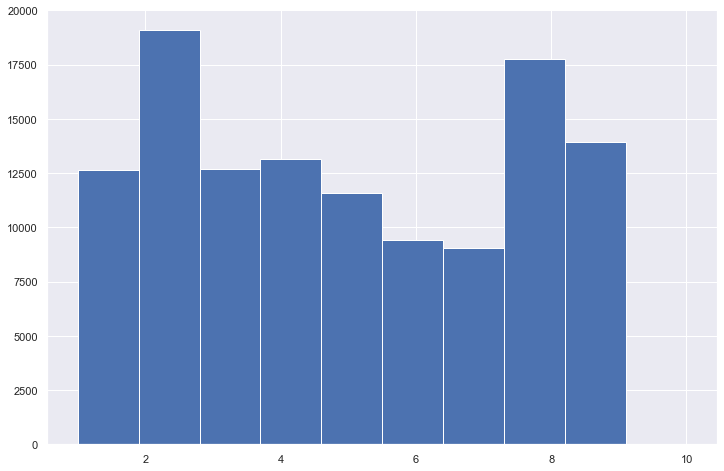

In [48]:
plt.figure(figsize = (12,8))
plt.hist(df['Waiting_days_bins'])

Text(0.5, 0, 'Cancelled')

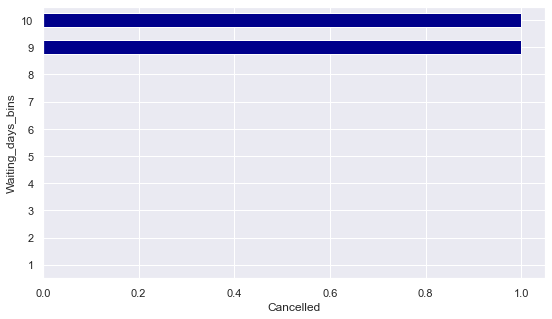

In [49]:
## Let's check the impact of Waiting_days_bins on is_canceled:

# group_by neighbourhood groups, take the median price and store new values in sub_df 
waiting_grouped = pd.DataFrame(df.groupby(['Waiting_days_bins'])['is_canceled'].agg(np.median))
waiting_grouped.reset_index(inplace=True)

# plot this 
waiting_grouped.sort_values(by=['is_canceled'], ascending=True)\
          .plot(kind='barh', x='Waiting_days_bins', y='is_canceled', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('Cancelled')

In [50]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

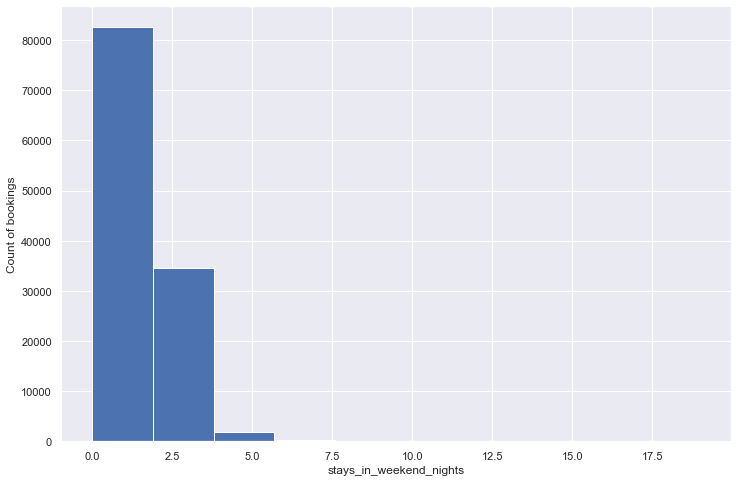

In [51]:
plt.figure(figsize = (12,8))
plt.hist(df['stays_in_weekend_nights'])
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('Count of bookings')
plt.show()

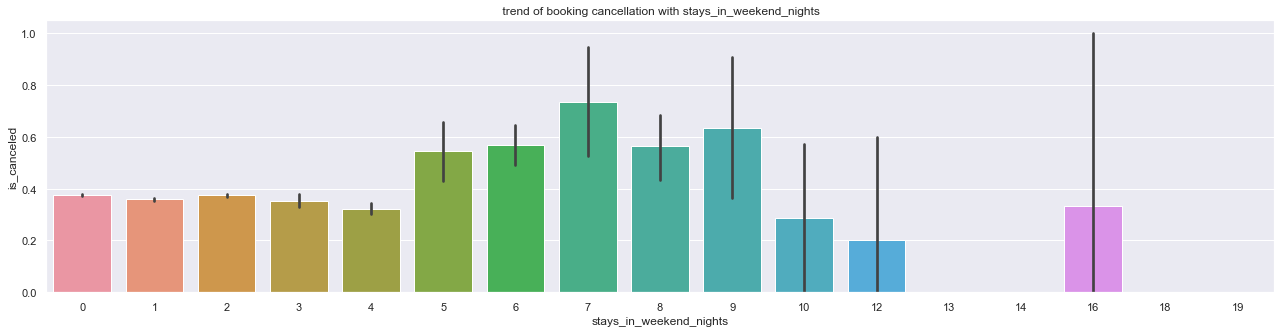

In [52]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'stays_in_weekend_nights', y = 'is_canceled', data = df)
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with stays_in_weekend_nights")
plt.show()

In [53]:
df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
26        1
32        1
33        1
34        1
35        1
41        1
42        1
50        1
Name: stays_in_week_nights, dtype: int64

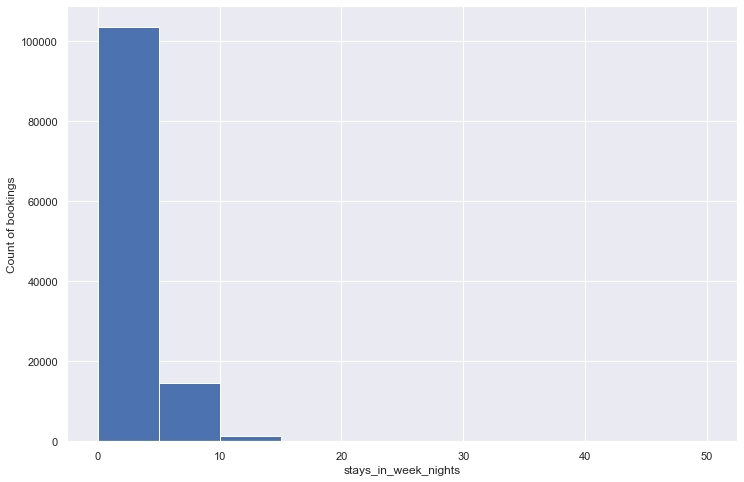

In [54]:
plt.figure(figsize = (12,8))
plt.hist(df['stays_in_week_nights'])
plt.xlabel('stays_in_week_nights')
plt.ylabel('Count of bookings')
plt.show()

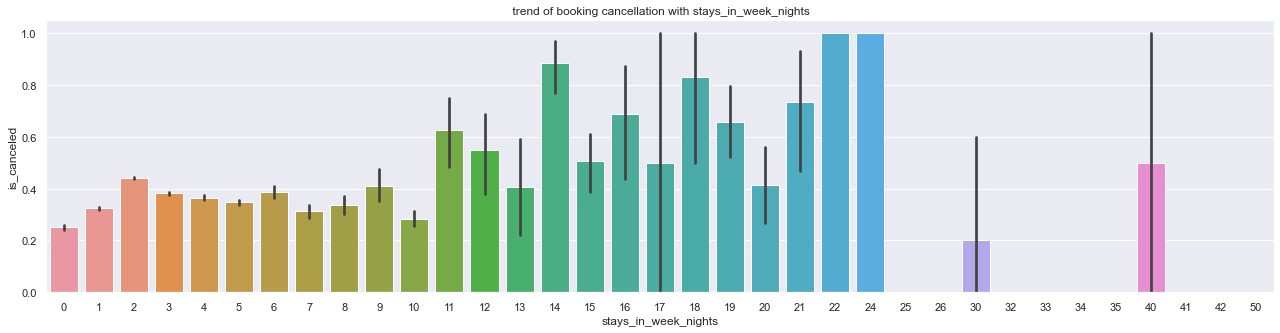

In [55]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'stays_in_week_nights', y = 'is_canceled', data = df)
plt.xlabel('stays_in_week_nights')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with stays_in_week_nights")
plt.show()

In [56]:
df_grouped_color = (df.groupby(['stays_in_weekend_nights'])
                    ['is_canceled']
                    .value_counts()
                    .unstack()
                    .reset_index(level=0, drop=True))

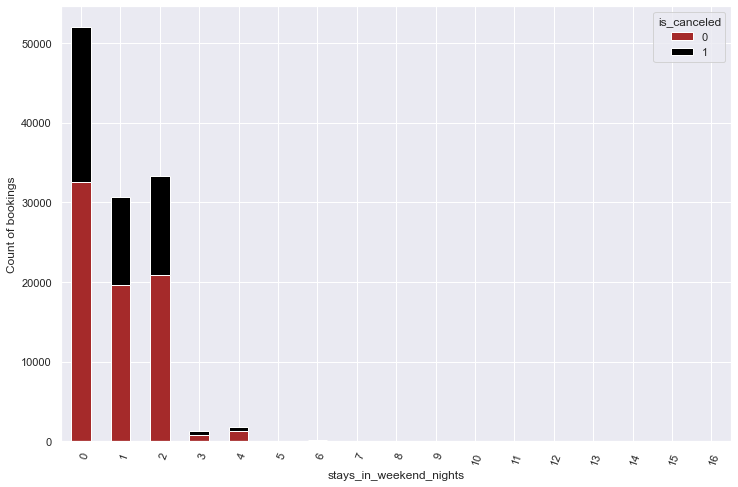

In [57]:
plt.rcParams["figure.figsize"] = [12,8]
ax = df_grouped_color.plot.bar(stacked=True, color=['brown', 'black'])
ax.set_xticklabels(labels=df_grouped_color.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('stays_in_weekend_nights')
ax.set_ylabel('Count of bookings')
plt.show()

In [58]:
df_grouped_color = (df.groupby(['stays_in_week_nights'])
                    ['is_canceled']
                    .value_counts()
                    .unstack()
                    .reset_index(level=0, drop=True))

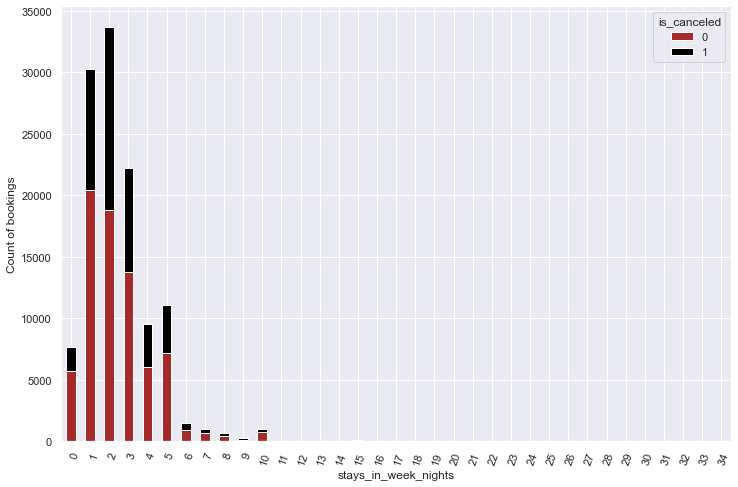

In [59]:
plt.rcParams["figure.figsize"] = [12,8]
ax = df_grouped_color.plot.bar(stacked=True, color=['brown', 'black'])
ax.set_xticklabels(labels=df_grouped_color.index, rotation=70, rotation_mode="anchor", ha="right")
ax.set_xlabel('stays_in_week_nights')
ax.set_ylabel('Count of bookings')
plt.show()

In [60]:
df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

(array([1.19376e+05, 2.00000e+00, 0.00000e+00, 2.00000e+00, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

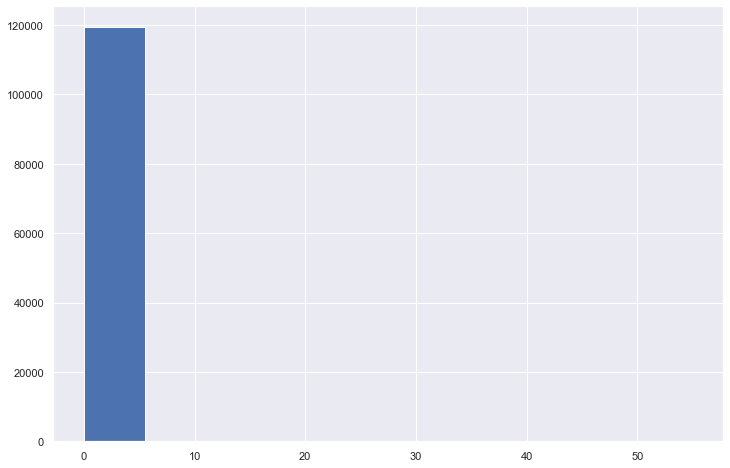

In [61]:
plt.figure(figsize = (12,8))
plt.hist(df['adults'])

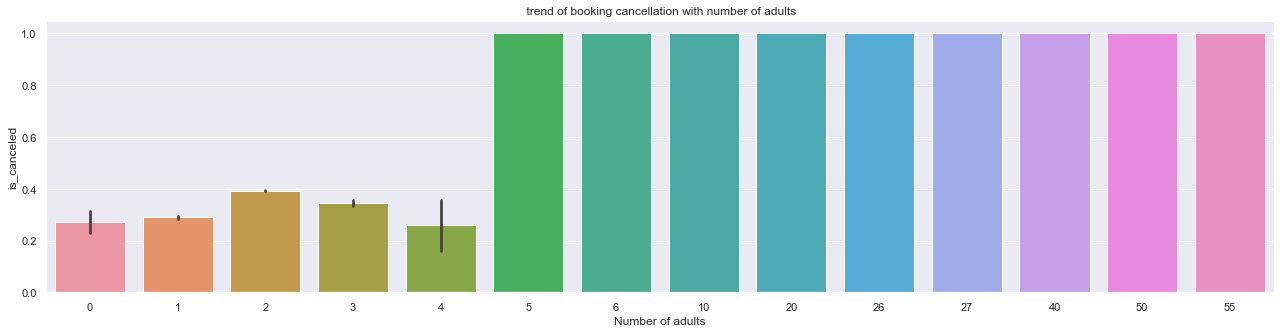

In [62]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'adults', y = 'is_canceled', data = df)
plt.xlabel('Number of adults')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with number of adults")
plt.show()

In [63]:
df['children'].value_counts()

0     110058
1       5446
2       3772
3        111
10         2
9          1
Name: children, dtype: int64

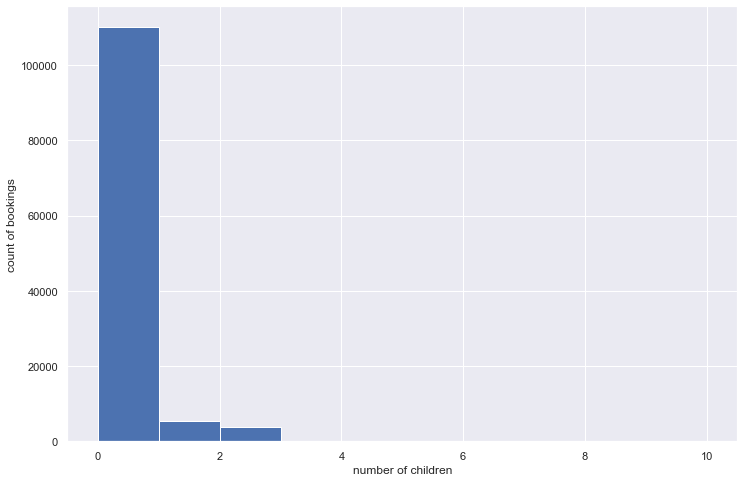

In [64]:
plt.figure(figsize = (12,8))
plt.hist(df['children'])
plt.xlabel('number of children')
plt.ylabel('count of bookings')
plt.show()

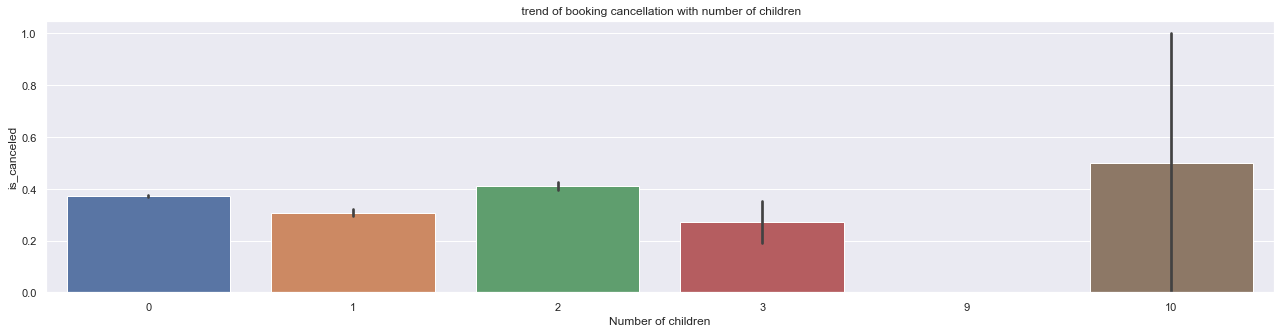

In [65]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'children', y = 'is_canceled', data = df)
plt.xlabel('Number of children')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with number of children")
plt.show()

In [66]:
df.meal.value_counts()

Only Breakfast               92310
Breakfast & dinner           14463
No meal                      11819
Breakfast, lunch & dinner      798
Name: meal, dtype: int64

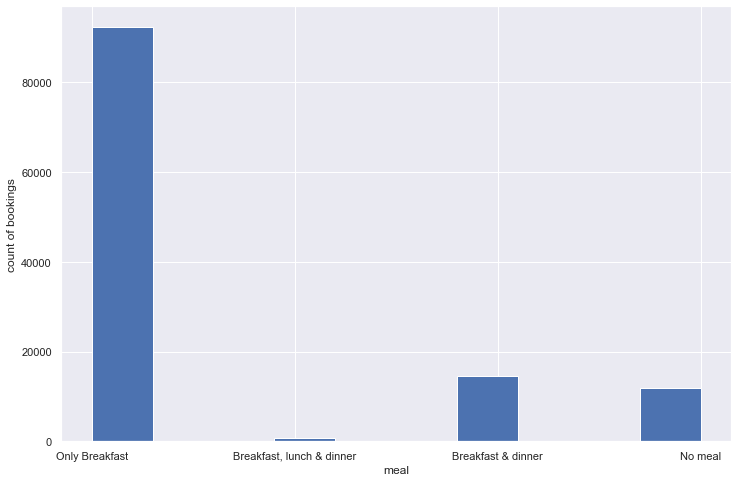

In [67]:
plt.figure(figsize = (12,8))
plt.hist(df['meal'])
plt.xlabel('meal')
plt.ylabel('count of bookings')
plt.show()

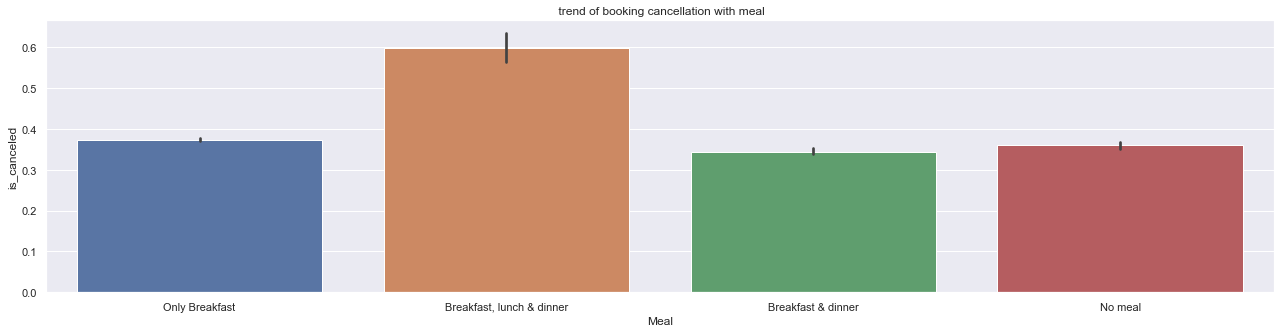

In [68]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'meal', y = 'is_canceled', data = df)
plt.xlabel('Meal')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with meal")
plt.show()

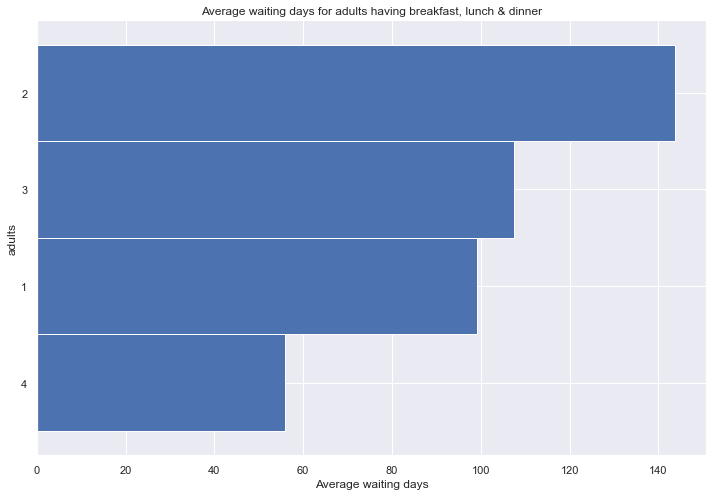

In [69]:
freq = df[df['meal']== 'Breakfast, lunch & dinner']
freq = freq.groupby('adults')['Waiting_days'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average waiting days for adults having breakfast, lunch & dinner")
plt.xlabel('Average waiting days')
plt.ylabel("adults")
plt.show()

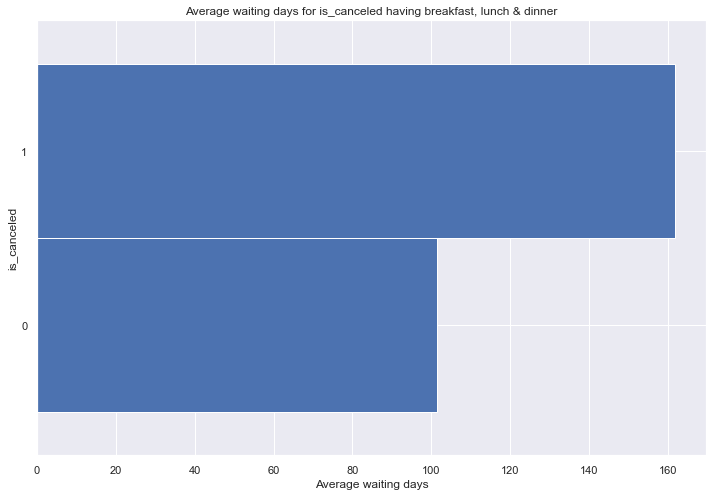

In [70]:
freq = df[df['meal']== 'Breakfast, lunch & dinner']
freq = freq.groupby('is_canceled')['Waiting_days'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average waiting days for is_canceled having breakfast, lunch & dinner")
plt.xlabel('Average waiting days')
plt.ylabel("is_canceled")
plt.show()

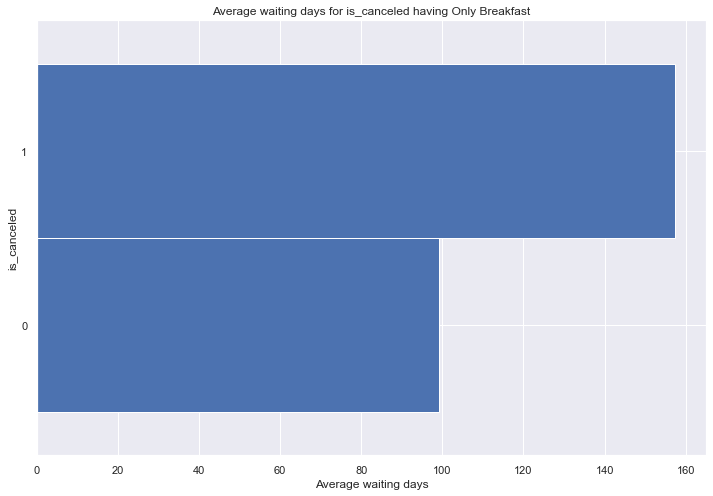

In [71]:
freq = df[df['meal']== 'Only Breakfast']
freq = freq.groupby('is_canceled')['Waiting_days'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average waiting days for is_canceled having Only Breakfast")
plt.xlabel('Average waiting days')
plt.ylabel("is_canceled")
plt.show()

In [72]:
df.country.value_counts()

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
UMI        1
PLW        1
BHS        1
ASM        1
PYF        1
Name: country, Length: 177, dtype: int64

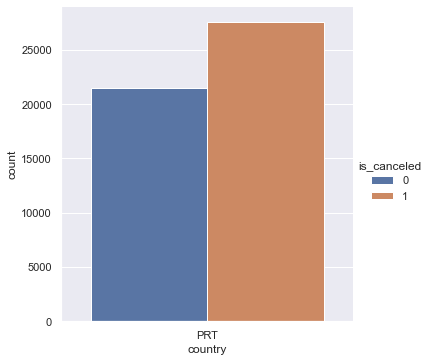

In [73]:
freq = df[df['country'] == 'PRT']
sns.catplot(x='country',hue='is_canceled',data=freq,kind="count")

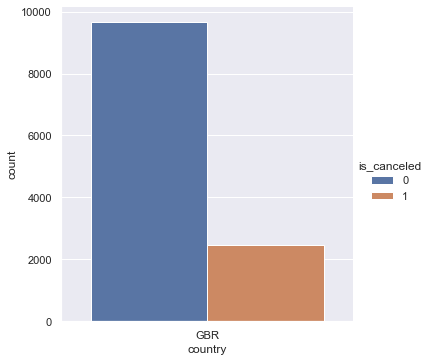

In [74]:
freq = df[df['country'] == 'GBR']
sns.catplot(x='country',hue='is_canceled',data=freq,kind="count")

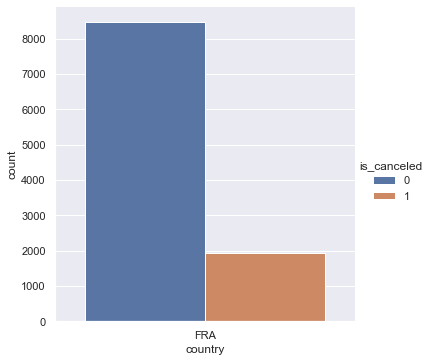

In [75]:
freq = df[df['country'] == 'FRA']
sns.catplot(x='country',hue='is_canceled',data=freq,kind="count")

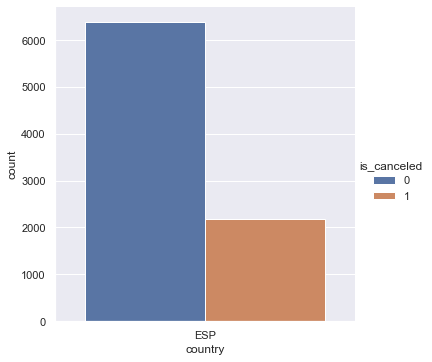

In [265]:
freq = df[df['country'] == 'ESP']
sns.catplot(x='country',hue='is_canceled',data=freq,kind="count")

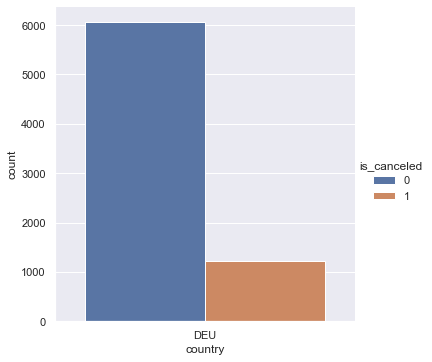

In [266]:
freq = df[df['country'] == 'DEU']
sns.catplot(x='country',hue='is_canceled',data=freq,kind="count")

In [267]:
df.market_segment.value_counts()

Online Travel Agents               56477
Offline Travel Agents/Operators    24219
Groups                             19811
Direct                             12606
Corporate                           5295
Complementary                        743
Aviation                             237
Undefined                              2
Name: market_segment, dtype: int64

(array([1.2606e+04, 5.2950e+03, 5.6477e+04, 0.0000e+00, 2.4219e+04,
        7.4300e+02, 0.0000e+00, 1.9811e+04, 2.0000e+00, 2.3700e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

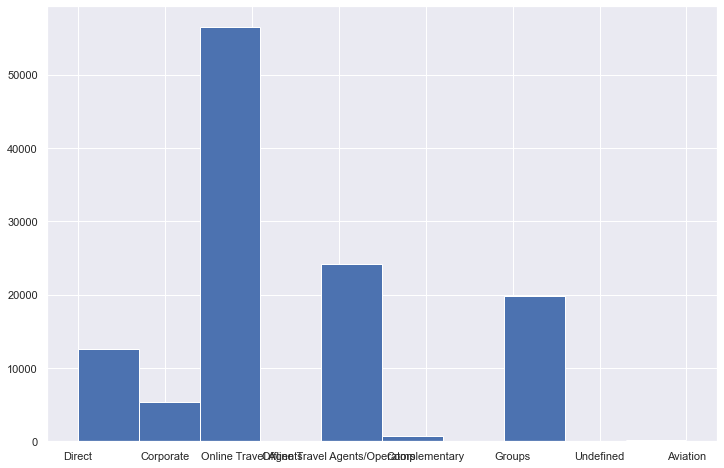

In [268]:
plt.figure(figsize = (12,8))
plt.hist(df['market_segment'])

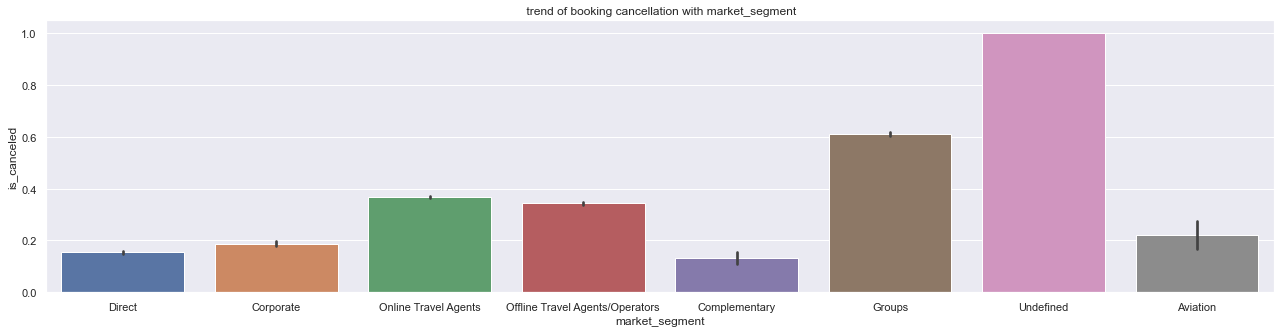

In [269]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'market_segment', y = 'is_canceled', data = df)
plt.xlabel('market_segment')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with market_segment")
plt.show()

In [270]:
df.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

(array([1.4645e+04, 0.0000e+00, 6.6770e+03, 0.0000e+00, 0.0000e+00,
        9.7870e+04, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.9300e+02]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

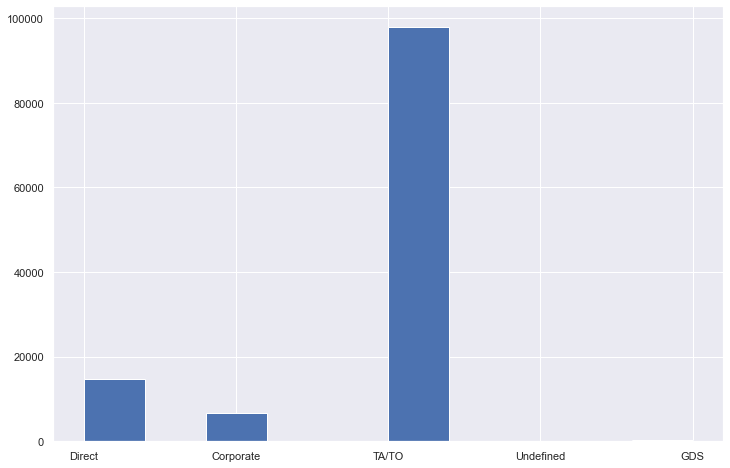

In [271]:
plt.figure(figsize = (12,8))
plt.hist(df['distribution_channel'])

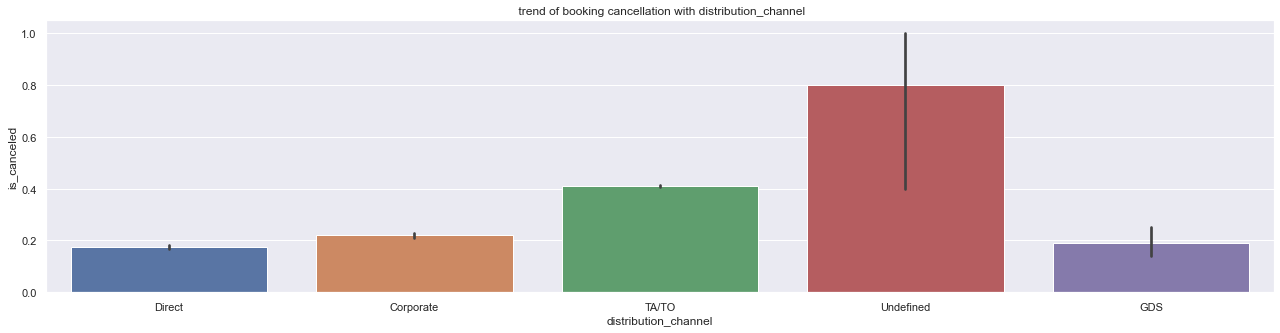

In [272]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'distribution_channel', y = 'is_canceled', data = df)
plt.xlabel('distribution_channel')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with distribution_channel")
plt.show()

In [273]:
df['is_repeated_customer'].value_counts()

0    115580
1      3810
Name: is_repeated_customer, dtype: int64

In [274]:
df['is_repeated_customer'].value_counts(1)

0    0.968088
1    0.031912
Name: is_repeated_customer, dtype: float64

(array([115580.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3810.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

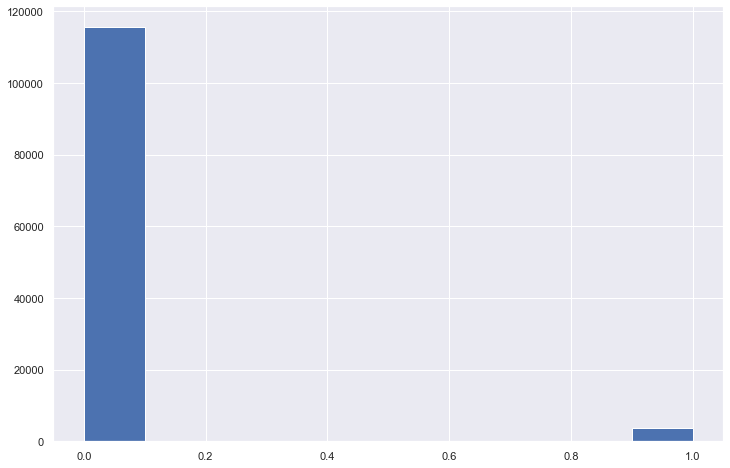

In [275]:
plt.figure(figsize = (12,8))
plt.hist(df['is_repeated_customer'])

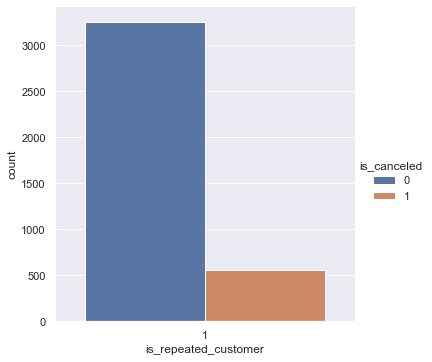

In [276]:
freq = df[df['is_repeated_customer'] == 1]
sns.catplot(x='is_repeated_customer',hue='is_canceled',data=freq,kind="count")

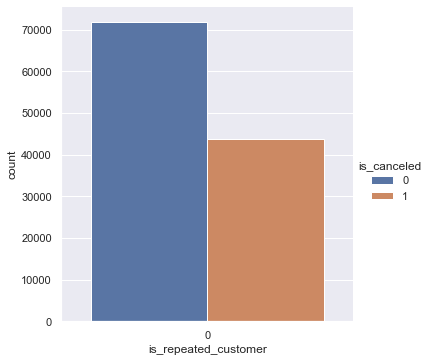

In [277]:
freq = df[df['is_repeated_customer'] == 0]
sns.catplot(x='is_repeated_customer',hue='is_canceled',data=freq,kind="count")

In [278]:
df.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
5         19
19        19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

(array([1.19073e+05, 1.15000e+02, 2.20000e+01, 0.00000e+00, 3.50000e+01,
        2.60000e+01, 0.00000e+00, 1.90000e+01, 1.00000e+00, 9.90000e+01]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

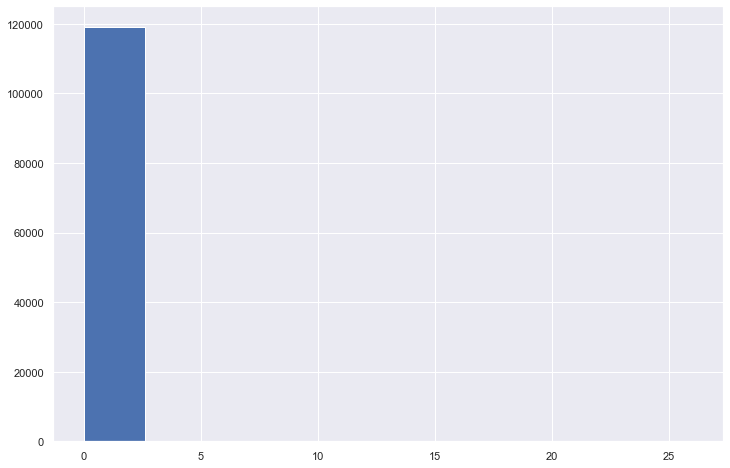

In [279]:
plt.figure(figsize = (12,8))
plt.hist(df['previous_cancellations'])

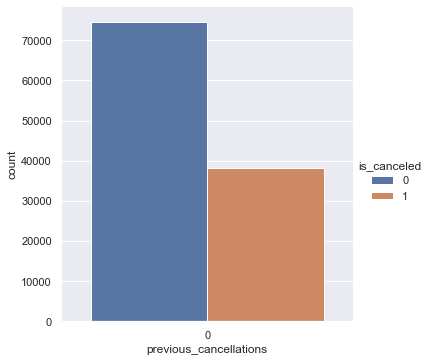

In [280]:
freq = df[df['previous_cancellations'] == 0]
sns.catplot(x='previous_cancellations',hue='is_canceled',data=freq,kind="count")

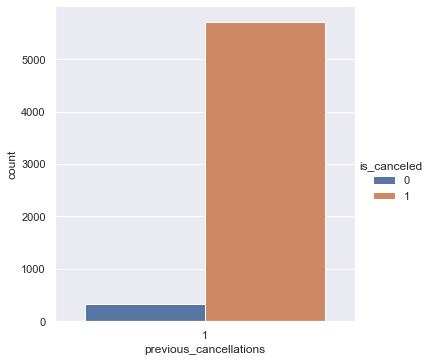

In [281]:
freq = df[df['previous_cancellations'] == 1]
sns.catplot(x='previous_cancellations',hue='is_canceled',data=freq,kind="count")

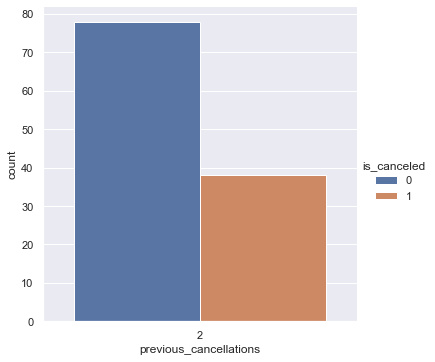

In [282]:
freq = df[df['previous_cancellations'] == 2]
sns.catplot(x='previous_cancellations',hue='is_canceled',data=freq,kind="count")

In [283]:
df.previous_bookings_not_canceled.value_counts()

0     115770
1       1542
2        580
3        333
4        229
5        181
6        115
7         88
8         70
9         60
10        53
11        43
12        37
13        30
14        28
15        21
16        20
25        17
17        16
18        14
19        13
20        12
21        12
22        10
24         9
27         9
28         7
23         7
26         7
29         6
30         4
32         2
31         2
48         2
44         2
58         2
50         1
51         1
53         1
49         1
47         1
46         1
52         1
72         1
54         1
55         1
56         1
57         1
59         1
60         1
61         1
62         1
45         1
40         1
43         1
33         1
70         1
69         1
68         1
67         1
66         1
65         1
64         1
34         1
42         1
35         1
36         1
37         1
38         1
39         1
71         1
41         1
63         1
Name: previous_bookings_not_canceled, dtype: int64

(array([1.18838e+05, 3.21000e+02, 1.08000e+02, 6.60000e+01, 1.70000e+01,
        8.00000e+00, 9.00000e+00, 7.00000e+00, 8.00000e+00, 8.00000e+00]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

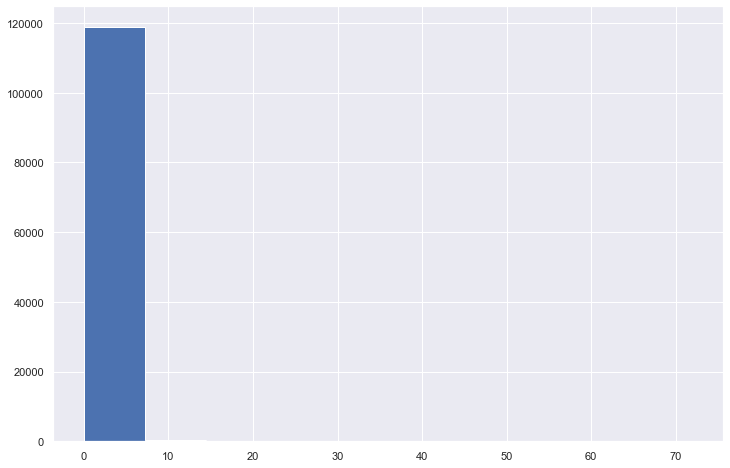

In [284]:
plt.figure(figsize = (12,8))
plt.hist(df['previous_bookings_not_canceled'])

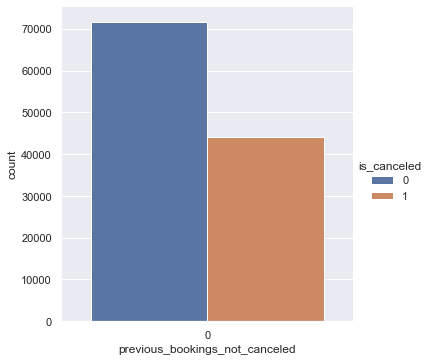

In [285]:
freq = df[df['previous_bookings_not_canceled'] == 0]
sns.catplot(x='previous_bookings_not_canceled',hue='is_canceled',data=freq,kind="count")

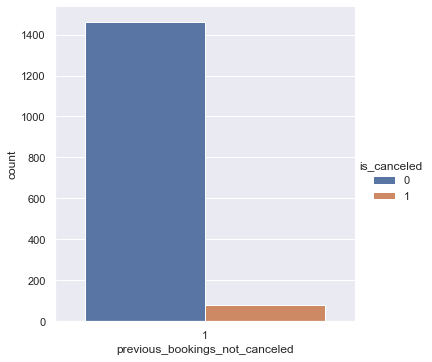

In [286]:
freq = df[df['previous_bookings_not_canceled'] == 1]
sns.catplot(x='previous_bookings_not_canceled',hue='is_canceled',data=freq,kind="count")

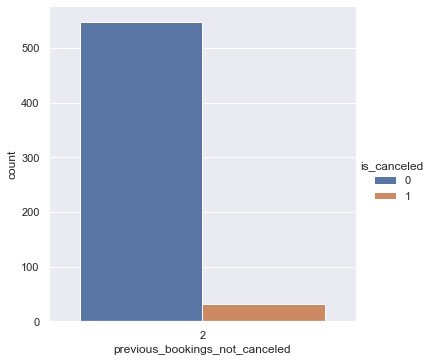

In [287]:
freq = df[df['previous_bookings_not_canceled'] == 2]
sns.catplot(x='previous_bookings_not_canceled',hue='is_canceled',data=freq,kind="count")

In [288]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

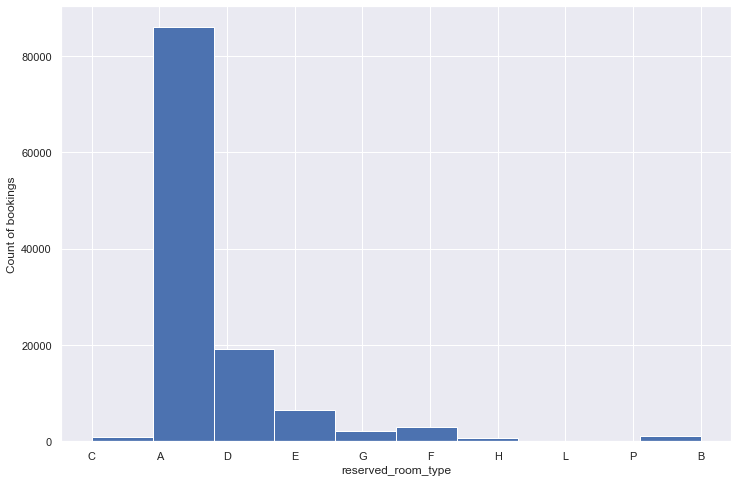

In [289]:
plt.figure(figsize = (12,8))
plt.hist(df['reserved_room_type'])
plt.xlabel('reserved_room_type')
plt.ylabel('Count of bookings')
plt.show()

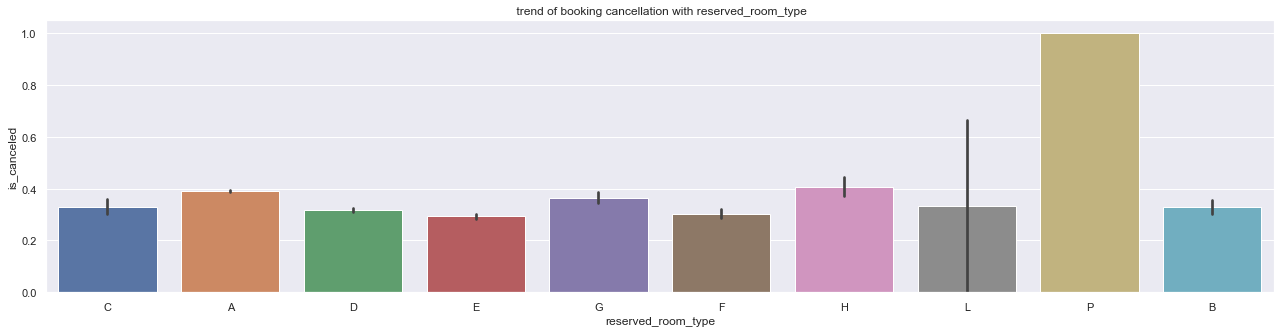

In [290]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'reserved_room_type', y = 'is_canceled', data = df)
plt.xlabel('reserved_room_type')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with reserved_room_type")
plt.show()

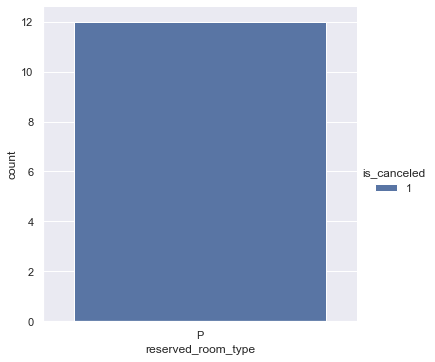

In [291]:
freq = df[df['reserved_room_type'] == 'P']
sns.catplot(x='reserved_room_type',hue='is_canceled',data=freq,kind="count")

In [292]:
freq.is_canceled.value_counts()

1    12
Name: is_canceled, dtype: int64

In [293]:
df.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

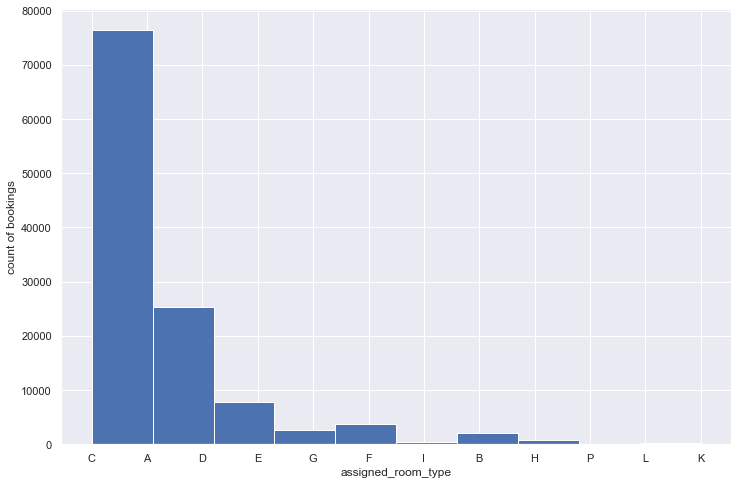

In [294]:
plt.figure(figsize = (12,8))
plt.hist(df['assigned_room_type'])
plt.xlabel('assigned_room_type')
plt.ylabel('count of bookings')
plt.show()

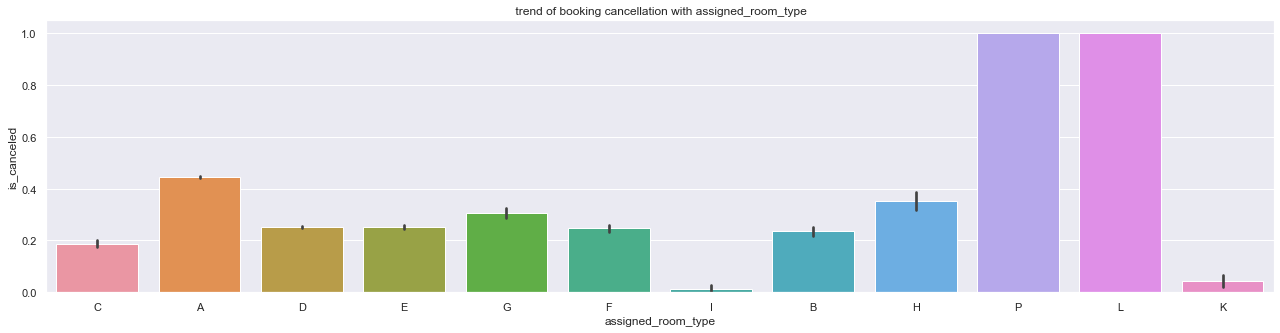

In [295]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'assigned_room_type', y = 'is_canceled', data = df)
plt.xlabel('assigned_room_type')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with assigned_room_type")
plt.show()

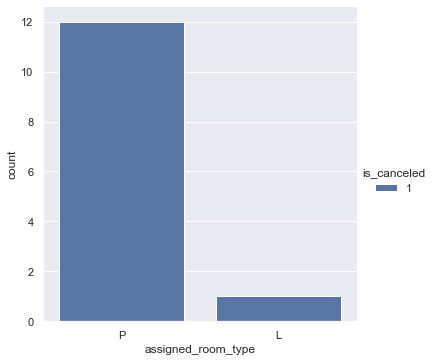

In [296]:
freq = df[(df['assigned_room_type'] == 'P') | (df['assigned_room_type'] == 'L')]
sns.catplot(x='assigned_room_type',hue='is_canceled',data=freq,kind="count")

In [297]:
freq.assigned_room_type.value_counts()

P    12
L     1
Name: assigned_room_type, dtype: int64

In [298]:
df.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64

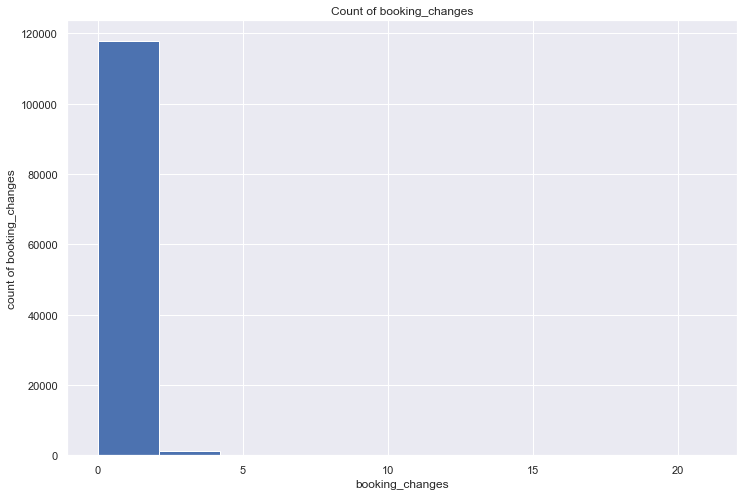

In [299]:
plt.figure(figsize = (12,8))
plt.hist(df['booking_changes'])
plt.xlabel('booking_changes')
plt.ylabel('count of booking_changes')
plt.title('Count of booking_changes')
plt.show()

Text(0.5, 8.960000000000022, '0 booking_changes')

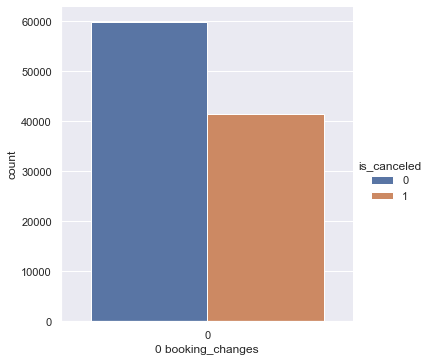

In [300]:
freq = df[df['booking_changes'] == 0]
sns.catplot(x='booking_changes',hue='is_canceled',data=freq,kind="count")
plt.xlabel('0 booking_changes')

Text(0.5, 8.960000000000022, '1 booking_changes')

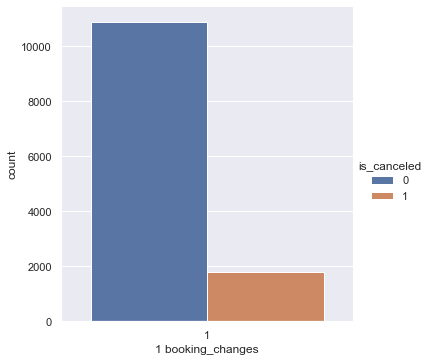

In [301]:
freq = df[df['booking_changes'] == 1]
sns.catplot(x='booking_changes',hue='is_canceled',data=freq,kind="count")
plt.xlabel('1 booking_changes')

Text(0.5, 8.960000000000022, '1 booking_changes')

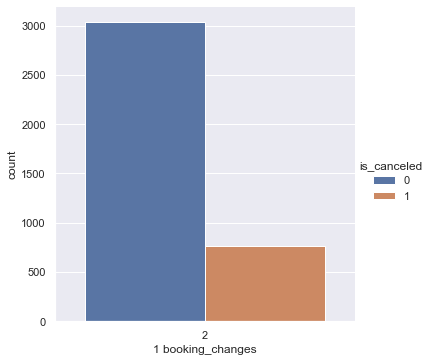

In [302]:
freq = df[df['booking_changes'] == 2]
sns.catplot(x='booking_changes',hue='is_canceled',data=freq,kind="count")
plt.xlabel('1 booking_changes')

In [303]:
freq0 = df[df['booking_changes'] == 0]
print('Value counts for is_canceled when booking changes = 0','\n', freq0.is_canceled.value_counts(1))
freq1 = df[df['booking_changes'] == 1]
print('Value counts for is_canceled when booking changes = 1','\n', freq1.is_canceled.value_counts(1))
freq2 = df[df['booking_changes'] == 2]
print('Value counts for is_canceled when booking changes = 2','\n', freq2.is_canceled.value_counts(1))

Value counts for is_canceled when booking changes = 0 
 0    0.591458
1    0.408542
Name: is_canceled, dtype: float64
Value counts for is_canceled when booking changes = 1 
 0    0.857728
1    0.142272
Name: is_canceled, dtype: float64
Value counts for is_canceled when booking changes = 2 
 0    0.798686
1    0.201314
Name: is_canceled, dtype: float64


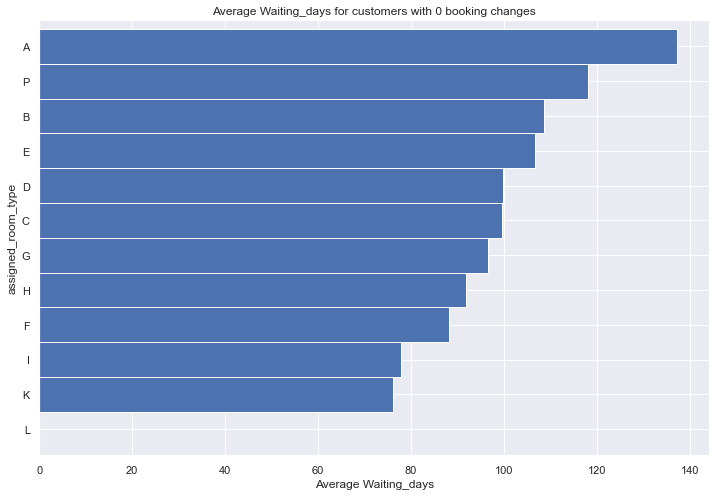

In [304]:
freq = df[df['booking_changes']== 0]
freq = freq.groupby('assigned_room_type')['Waiting_days'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12, 8), width=1)
plt.title("Average Waiting_days for customers with 0 booking changes")
plt.xlabel('Average Waiting_days')
plt.ylabel("assigned_room_type")
plt.show()

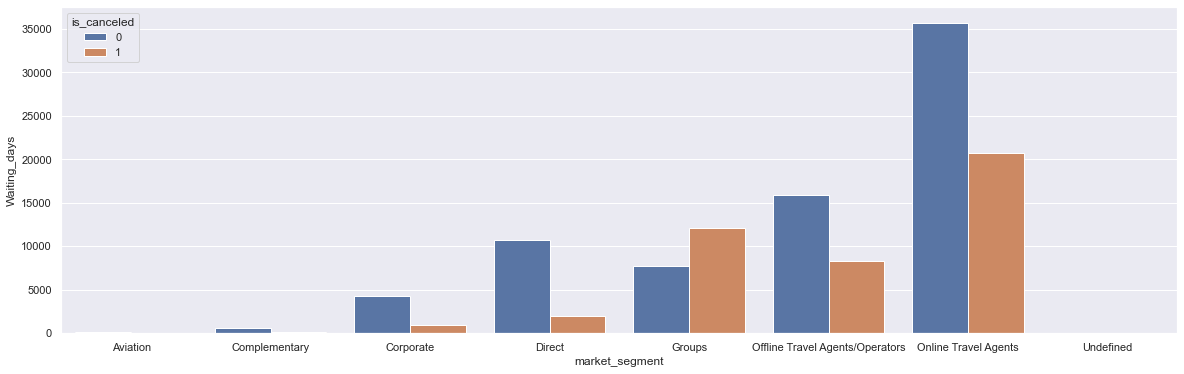

In [305]:
res = df.groupby(['market_segment', 'is_canceled']).count()
res = res.reset_index()


# viz
plt.figure(figsize = (20,6))
ax = sns.barplot(x='market_segment',
                y= 'Waiting_days',
                hue='is_canceled',
                data=res,
                ci=None,
                   )
plt.show()

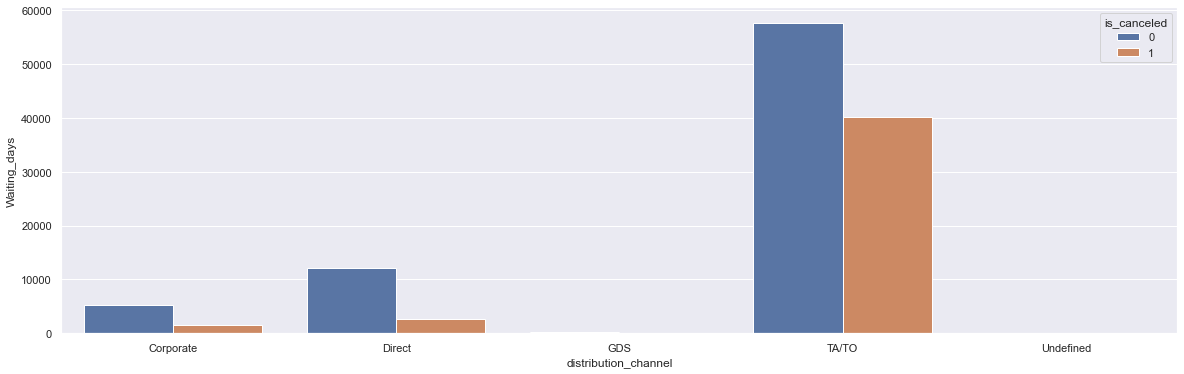

In [306]:
res = df.groupby(['distribution_channel', 'is_canceled']).count()
res = res.reset_index()


# viz
plt.figure(figsize = (20,6))
ax = sns.barplot(x='distribution_channel',
                y= 'Waiting_days',
                hue='is_canceled',
                data=res,
                ci=None,
                   )
plt.show()

In [307]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

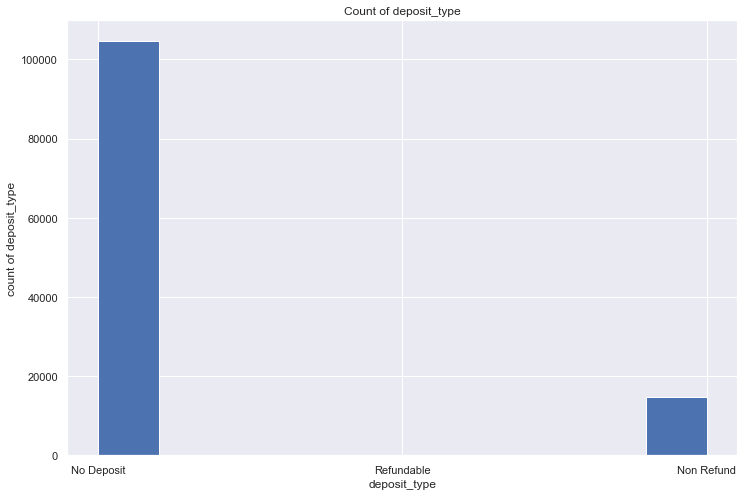

In [308]:
plt.figure(figsize = (12,8))
plt.hist(df['deposit_type'])
plt.xlabel('deposit_type')
plt.ylabel('count of deposit_type')
plt.title('Count of deposit_type')
plt.show()

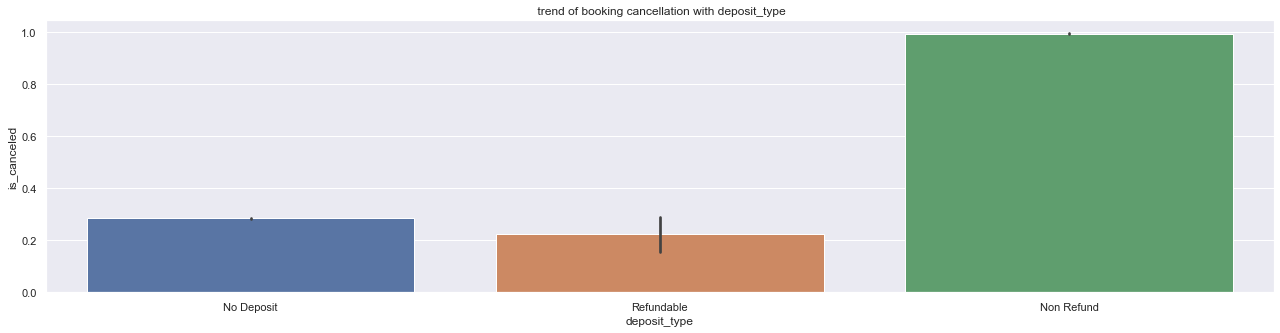

In [309]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'deposit_type', y = 'is_canceled', data = df)
plt.xlabel('deposit_type')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with deposit_type")
plt.show()

In [310]:
df.agent.value_counts()

9.0      31961
14.0     19980
240.0    13922
1.0       7191
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

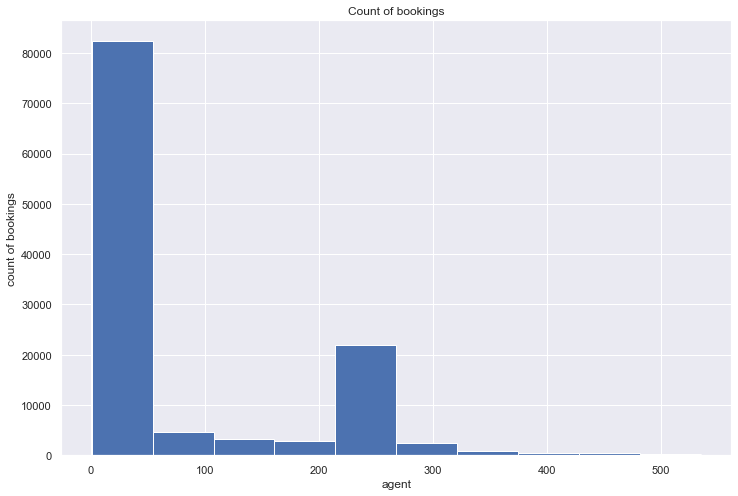

In [311]:
plt.figure(figsize = (12,8))
plt.hist(df['agent'])
plt.xlabel('agent')
plt.ylabel('count of bookings')
plt.title('Count of bookings')
plt.show()

In [76]:
df = df.drop(['agent'], axis = 1)

In [66]:
df.days_in_waiting_list.value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
36          1
193         1
37          1
165         1
74          1
Name: days_in_waiting_list, Length: 128, dtype: int64

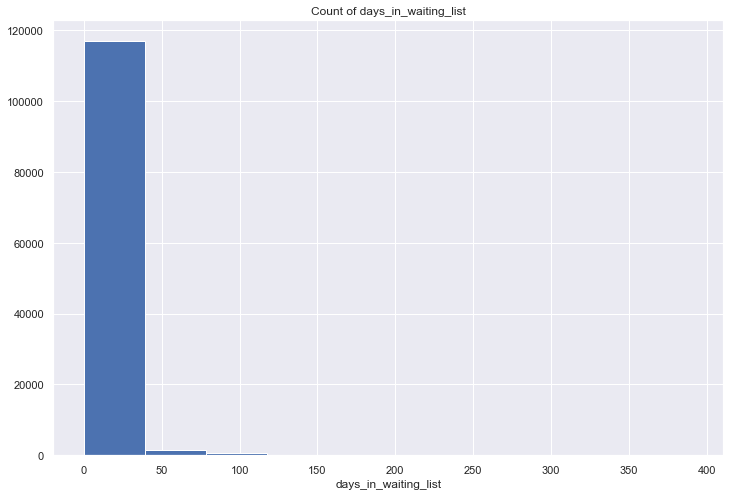

In [54]:
plt.figure(figsize = (12,8))
plt.hist(df['days_in_waiting_list'])
plt.xlabel('days_in_waiting_list')
plt.title('Count of days_in_waiting_list')
plt.show()

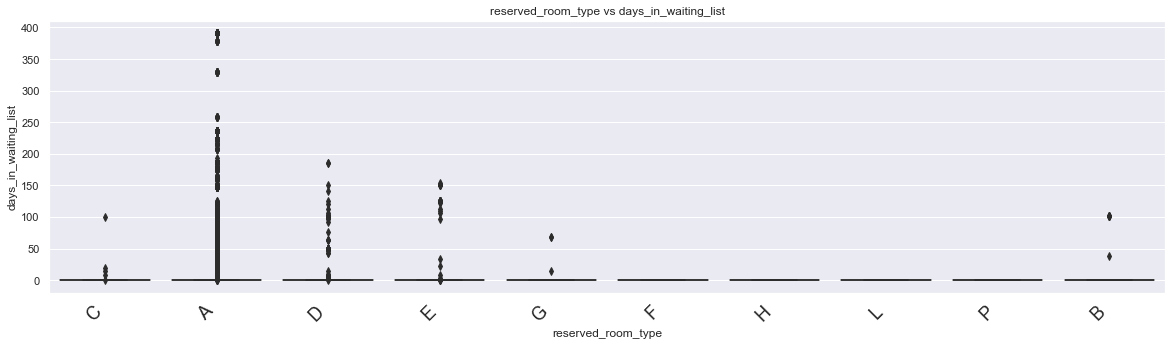

In [65]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="reserved_room_type", y="days_in_waiting_list", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('reserved_room_type vs days_in_waiting_list')
chart;

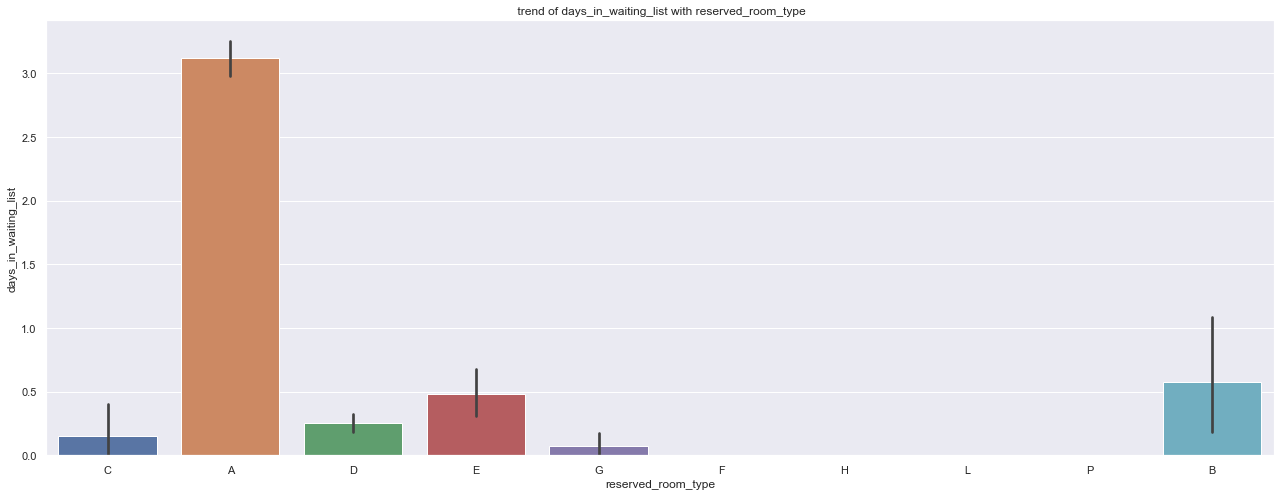

In [316]:
plt.figure(figsize = (22,8))
sns.barplot(x = 'reserved_room_type', y = 'days_in_waiting_list', data = df)
plt.xlabel('reserved_room_type')
plt.ylabel('days_in_waiting_list')
plt.title(" trend of days_in_waiting_list with reserved_room_type")
plt.show()

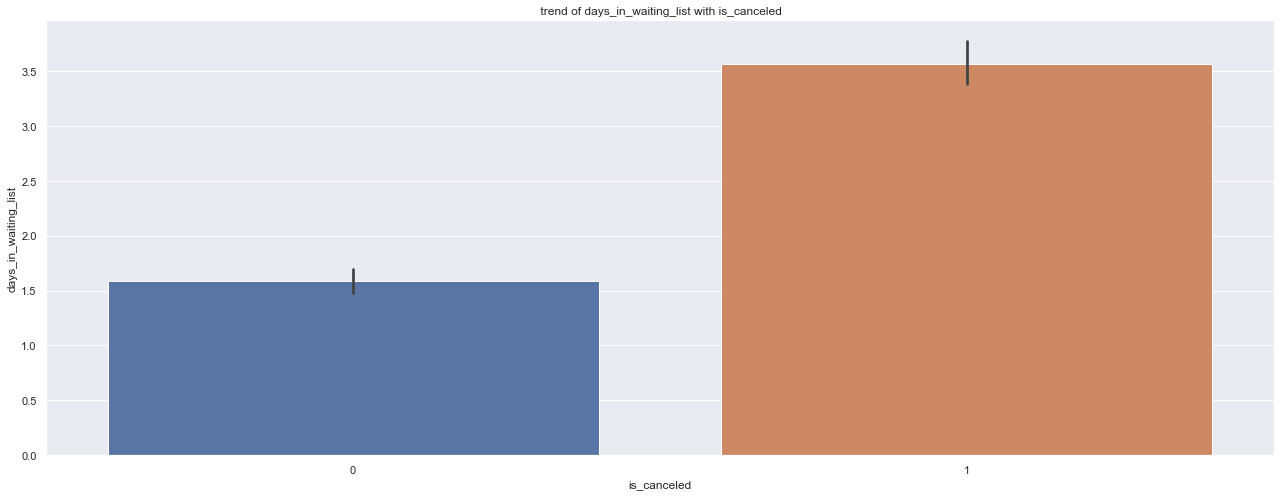

In [317]:
plt.figure(figsize = (22,8))
sns.barplot(x = 'is_canceled', y = 'days_in_waiting_list', data = df)
plt.xlabel('is_canceled')
plt.ylabel('days_in_waiting_list')
plt.title(" trend of days_in_waiting_list with is_canceled")
plt.show()

In [318]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

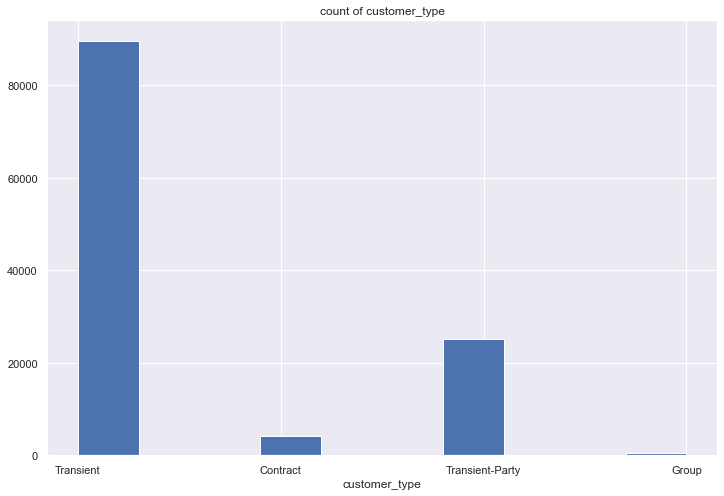

In [319]:
plt.figure(figsize = (12,8))
plt.hist(df['customer_type'])
plt.xlabel('customer_type')
plt.title('count of customer_type')
plt.show()

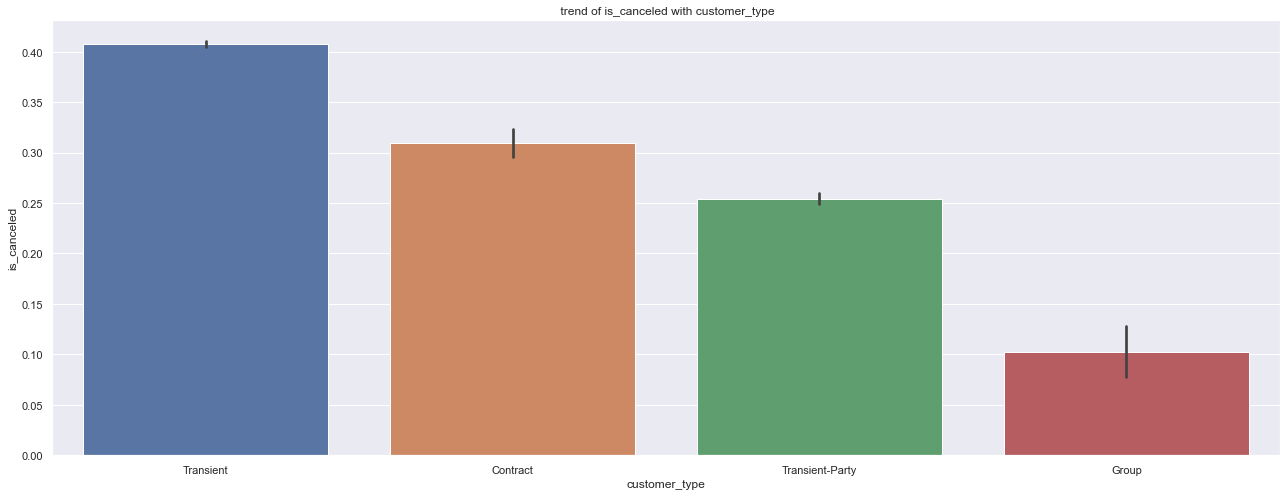

In [320]:
plt.figure(figsize = (22,8))
sns.barplot(x = 'customer_type', y = 'is_canceled', data = df)
plt.xlabel('customer_type')
plt.ylabel('is_canceled')
plt.title(" trend of is_canceled with customer_type")
plt.show()

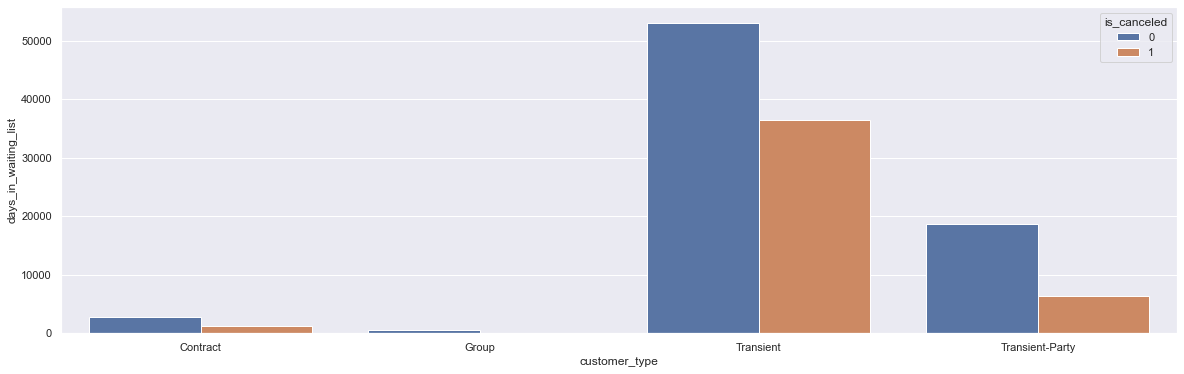

In [321]:
res = df.groupby(['customer_type', 'is_canceled']).count()
res = res.reset_index()


# viz
plt.figure(figsize = (20,6))
ax = sns.barplot(x='customer_type',
                y= 'days_in_waiting_list',
                hue='is_canceled',
                data=res,
                ci=None,
                   )
plt.show()

Text(0.5, 8.960000000000022, 'customer_type for Contract')

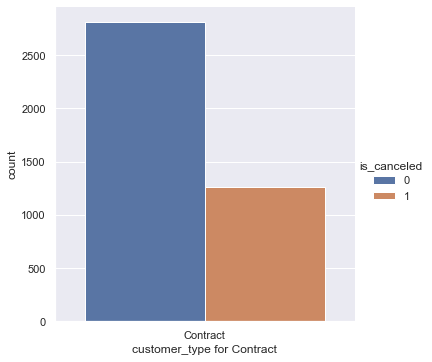

In [322]:
freq = df[df['customer_type'] == 'Contract']
sns.catplot(x='customer_type',hue='is_canceled',data=freq,kind="count")
plt.xlabel('customer_type for Contract')

Text(0.5, 8.960000000000022, 'customer_type for Group')

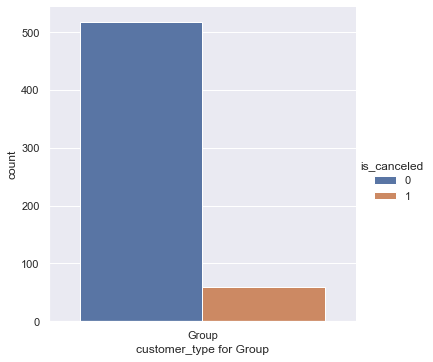

In [323]:
freq = df[df['customer_type'] == 'Group']
sns.catplot(x='customer_type',hue='is_canceled',data=freq,kind="count")
plt.xlabel('customer_type for Group')

Text(0.5, 8.95999999999998, 'customer_type for Transient-Party')

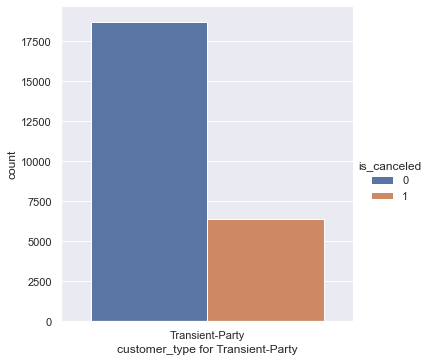

In [324]:
freq = df[df['customer_type'] == 'Transient-Party']
sns.catplot(x='customer_type',hue='is_canceled',data=freq,kind="count")
plt.xlabel('customer_type for Transient-Party')

In [325]:
freq0 = df[df['customer_type'] == 'Contract']
print("Value counts for is_canceled when customer_type = Contract","\n", freq0.is_canceled.value_counts(1))
freq1 = df[df['customer_type'] == 'Group']
print('Value counts for is_canceled when customer_type = Group','\n', freq1.is_canceled.value_counts(1))
freq2 = df[df['customer_type'] == 'Transient-Party']
print('Value counts for is_canceled when customer_type = Transient-Party','\n', freq2.is_canceled.value_counts(1))
freq3 = df[df['customer_type'] == 'Transient']
print('Value counts for is_canceled when customer_type = Transient','\n', freq3.is_canceled.value_counts(1))

Value counts for is_canceled when customer_type = Contract 
 0    0.690383
1    0.309617
Name: is_canceled, dtype: float64
Value counts for is_canceled when customer_type = Group 
 0    0.897747
1    0.102253
Name: is_canceled, dtype: float64
Value counts for is_canceled when customer_type = Transient-Party 
 0    0.745701
1    0.254299
Name: is_canceled, dtype: float64
Value counts for is_canceled when customer_type = Transient 
 0    0.592537
1    0.407463
Name: is_canceled, dtype: float64


In [326]:
df.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

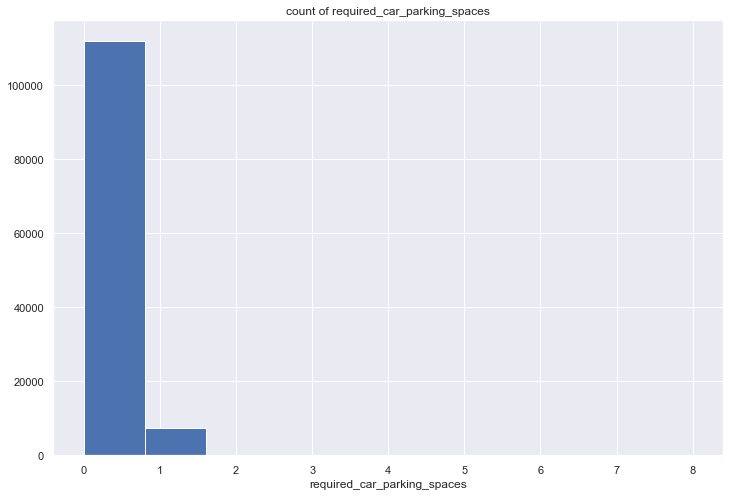

In [327]:
plt.figure(figsize = (12,8))
plt.hist(df['required_car_parking_spaces'])
plt.xlabel('required_car_parking_spaces')
plt.title('count of required_car_parking_spaces')
plt.show()

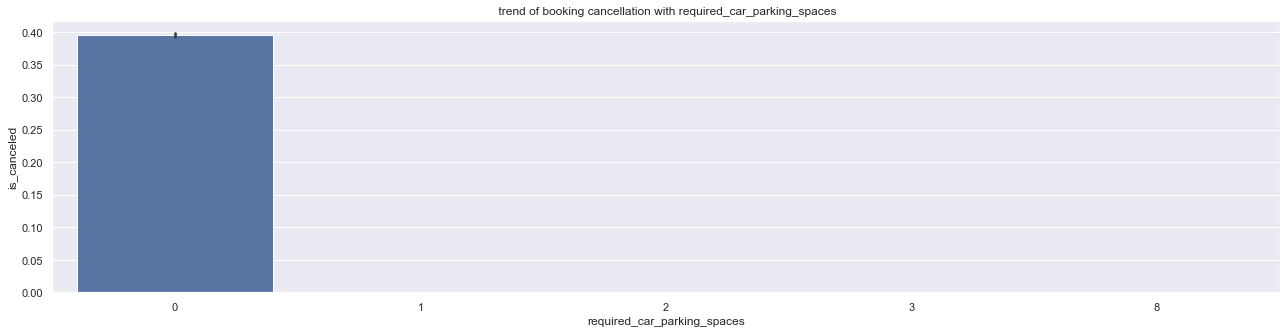

In [328]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'required_car_parking_spaces', y = 'is_canceled', data = df)
plt.xlabel('required_car_parking_spaces')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with required_car_parking_spaces")
plt.show()

Text(0.5, 8.960000000000022, 'required_car_parking_spaces is 0')

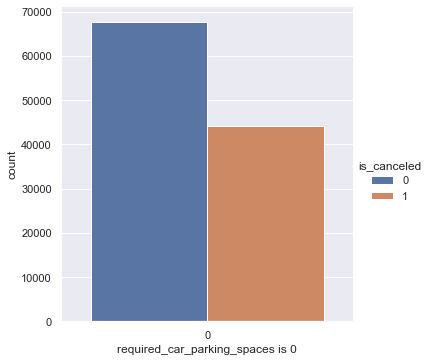

In [329]:
freq = df[df['required_car_parking_spaces'] == 0]
sns.catplot(x='required_car_parking_spaces',hue='is_canceled',data=freq,kind="count")
plt.xlabel('required_car_parking_spaces is 0')

Text(0.5, 8.960000000000022, 'required_car_parking_spaces is 1')

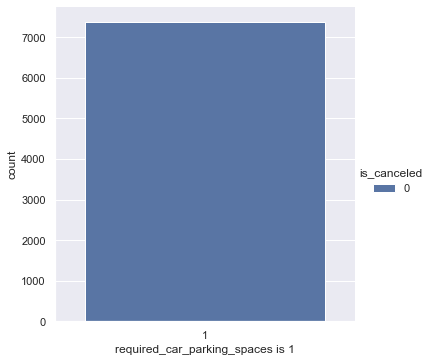

In [330]:
freq = df[df['required_car_parking_spaces'] == 1]
sns.catplot(x='required_car_parking_spaces',hue='is_canceled',data=freq,kind="count")
plt.xlabel('required_car_parking_spaces is 1')

Text(0.5, 8.960000000000022, 'required_car_parking_spaces is 2')

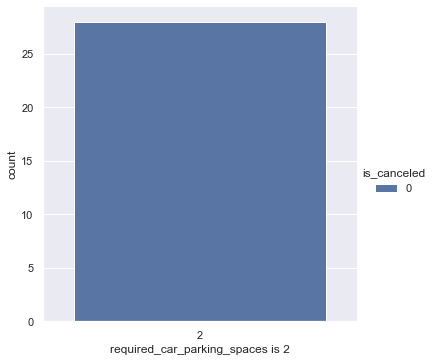

In [331]:
freq = df[df['required_car_parking_spaces'] == 2]
sns.catplot(x='required_car_parking_spaces',hue='is_canceled',data=freq,kind="count")
plt.xlabel('required_car_parking_spaces is 2')

Text(0.5, 8.960000000000022, 'required_car_parking_spaces is 3')

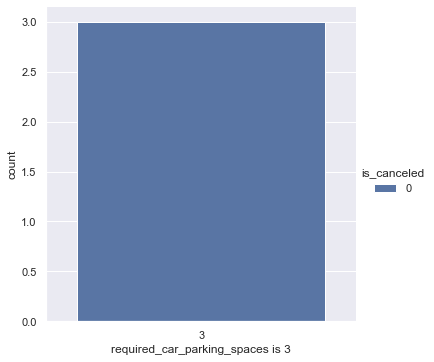

In [332]:
freq = df[df['required_car_parking_spaces'] == 3]
sns.catplot(x='required_car_parking_spaces',hue='is_canceled',data=freq,kind="count")
plt.xlabel('required_car_parking_spaces is 3')

Text(0.5, 8.960000000000022, 'required_car_parking_spaces is 8')

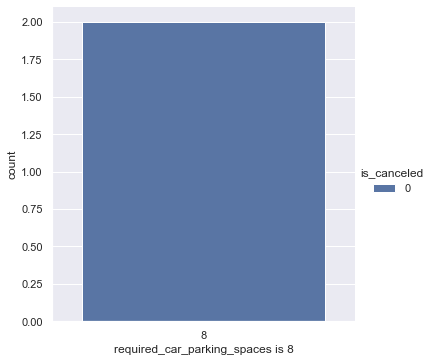

In [333]:
freq = df[df['required_car_parking_spaces'] == 8]
sns.catplot(x='required_car_parking_spaces',hue='is_canceled',data=freq,kind="count")
plt.xlabel('required_car_parking_spaces is 8')

In [334]:
df.totalno_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: totalno_of_special_requests, dtype: int64

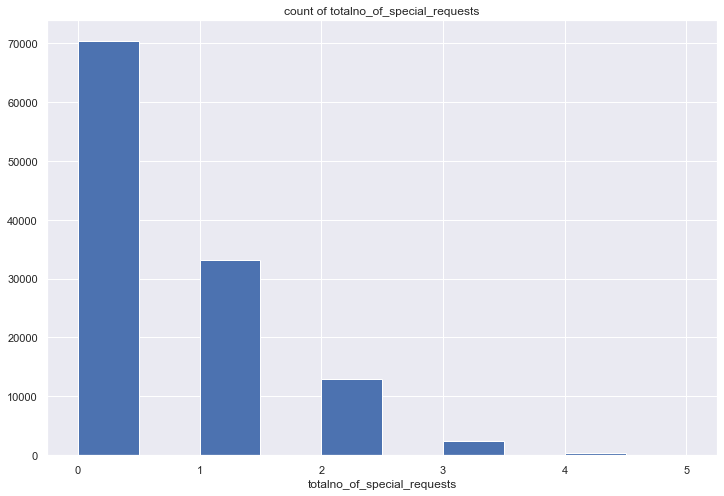

In [335]:
plt.figure(figsize = (12,8))
plt.hist(df['totalno_of_special_requests'])
plt.xlabel('totalno_of_special_requests')
plt.title('count of totalno_of_special_requests')
plt.show()

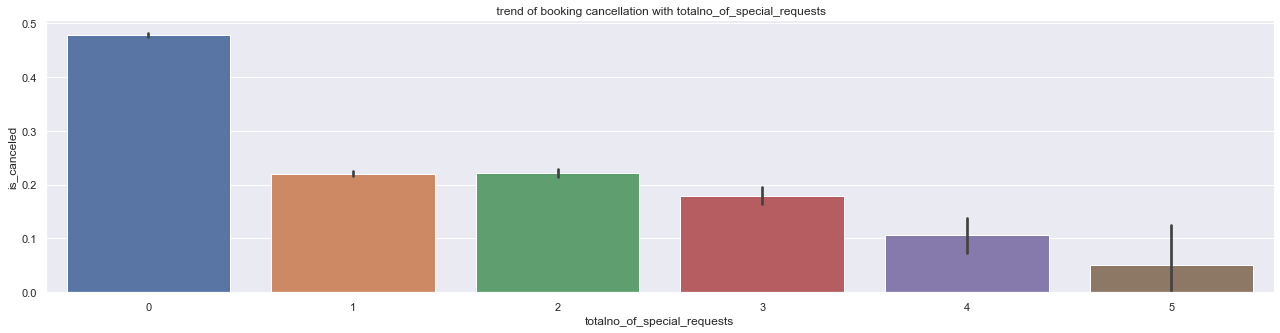

In [336]:
plt.figure(figsize = (22,5))
sns.barplot(x = 'totalno_of_special_requests', y = 'is_canceled', data = df)
plt.xlabel('totalno_of_special_requests')
plt.ylabel('is_canceled')
plt.title(" trend of booking cancellation with totalno_of_special_requests")
plt.show()

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 0')

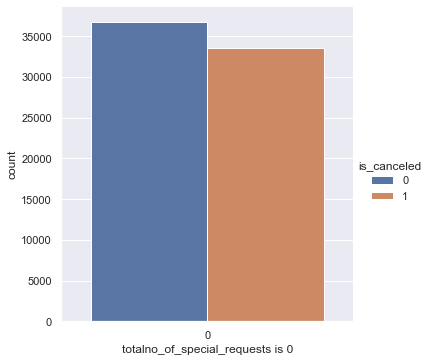

In [337]:
freq = df[df['totalno_of_special_requests'] == 0]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 0')

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 1')

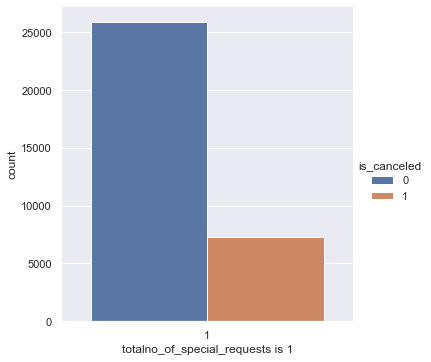

In [338]:
freq = df[df['totalno_of_special_requests'] == 1]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 1')

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 2')

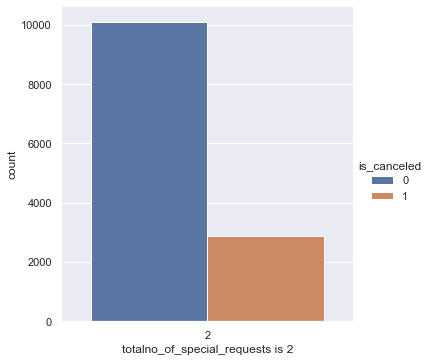

In [339]:
freq = df[df['totalno_of_special_requests'] == 2]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 2')

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 3')

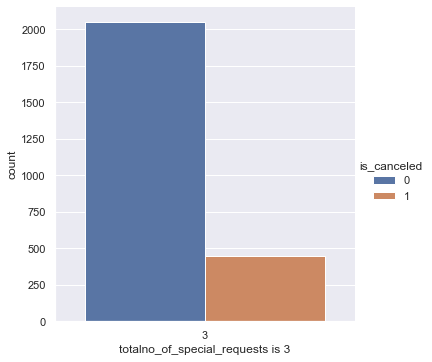

In [340]:
freq = df[df['totalno_of_special_requests'] == 3]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 3')

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 4')

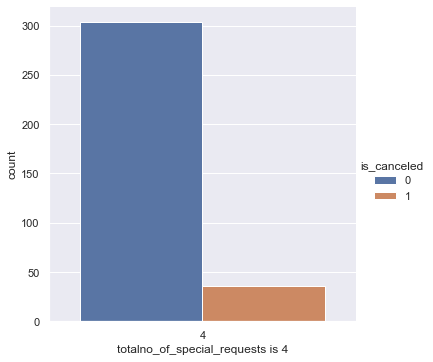

In [341]:
freq = df[df['totalno_of_special_requests'] == 4]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 4')

Text(0.5, 8.960000000000022, 'totalno_of_special_requests is 5')

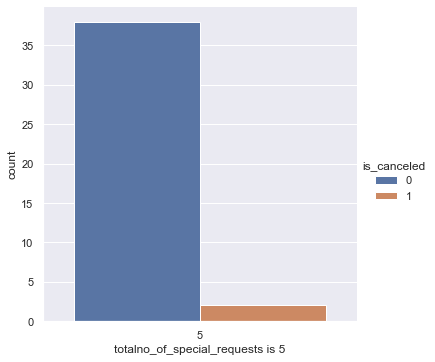

In [342]:
freq = df[df['totalno_of_special_requests'] == 5]
sns.catplot(x='totalno_of_special_requests',hue='is_canceled',data=freq,kind="count")
plt.xlabel('totalno_of_special_requests is 5')

In [343]:
freq0 = df[df['totalno_of_special_requests'] == 0]
print("Value counts for is_canceled when totalno_of_special_requests = 0","\n", freq0.is_canceled.value_counts(1))
freq1 = df[df['totalno_of_special_requests'] == 1]
print('Value counts for is_canceled when totalno_of_special_requests = 1','\n', freq1.is_canceled.value_counts(1))
freq2 = df[df['totalno_of_special_requests'] == 2]
print('Value counts for is_canceled when totalno_of_special_requests = 2','\n', freq2.is_canceled.value_counts(1))
freq3 = df[df['totalno_of_special_requests'] == 3]
print('Value counts for is_canceled when totalno_of_special_requests = 3','\n', freq3.is_canceled.value_counts(1))
freq4 = df[df['totalno_of_special_requests'] == 4]
print('Value counts for is_canceled when totalno_of_special_requests = 4','\n', freq4.is_canceled.value_counts(1))
freq5 = df[df['totalno_of_special_requests'] == 5]
print('Value counts for is_canceled when totalno_of_special_requests = 5','\n', freq5.is_canceled.value_counts(1))

Value counts for is_canceled when totalno_of_special_requests = 0 
 0    0.522796
1    0.477204
Name: is_canceled, dtype: float64
Value counts for is_canceled when totalno_of_special_requests = 1 
 0    0.779751
1    0.220249
Name: is_canceled, dtype: float64
Value counts for is_canceled when totalno_of_special_requests = 2 
 0    0.779011
1    0.220989
Name: is_canceled, dtype: float64
Value counts for is_canceled when totalno_of_special_requests = 3 
 0    0.821386
1    0.178614
Name: is_canceled, dtype: float64
Value counts for is_canceled when totalno_of_special_requests = 4 
 0    0.894118
1    0.105882
Name: is_canceled, dtype: float64
Value counts for is_canceled when totalno_of_special_requests = 5 
 0    0.95
1    0.05
Name: is_canceled, dtype: float64


#### One hot encoding and Label encoding of categorical variables:

In [77]:
cat_cols = ['hotel','meal','booking_year','booking_month','arrival_year','arrival_month','market_segment','distribution_channel','deposit_type','customer_type','reserved_room_type','assigned_room_type']

In [78]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = False)

In [79]:
df = df.drop(['booking_date','arrival_date','Waiting_days'], axis = 1)

In [80]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])

In [81]:
df.head()

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,is_repeated_customer,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,totalno_of_special_requests,Waiting_days_bins,hotel_type_1,hotel_type_2,meal_Breakfast & dinner,"meal_Breakfast, lunch & dinner",meal_No meal,meal_Only Breakfast,booking_year_2016,booking_year_2017,booking_year_2018,booking_year_2019,booking_year_2020,booking_month_1,booking_month_2,booking_month_3,booking_month_4,booking_month_5,booking_month_6,booking_month_7,booking_month_8,booking_month_9,booking_month_10,booking_month_11,booking_month_12,arrival_year_2018,arrival_year_2019,arrival_year_2020,arrival_month_1,arrival_month_2,arrival_month_3,arrival_month_4,arrival_month_5,arrival_month_6,arrival_month_7,arrival_month_8,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline Travel Agents/Operators,market_segment_Online Travel Agents,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,0,0,0,2,0,135,0,0,0,3,0,0,0,7,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,135,0,0,0,4,0,0,0,9,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,59,0,0,0,0,0,0,0,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,59,0,0,0,0,0,0,0,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,2,0,59,0,0,0,0,0,0,1,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 94 columns):
 #   Column                                          Non-Null Count   Dtype
---  ------                                          --------------   -----
 0   is_canceled                                     119390 non-null  int64
 1   stays_in_weekend_nights                         119390 non-null  int64
 2   stays_in_week_nights                            119390 non-null  int64
 3   adults                                          119390 non-null  int64
 4   children                                        119390 non-null  int64
 5   country                                         119390 non-null  int32
 6   is_repeated_customer                            119390 non-null  int64
 7   previous_cancellations                          119390 non-null  int64
 8   previous_bookings_not_canceled                  119390 non-null  int64
 9   booking_changes                                 

In [82]:
df = df.rename(columns = {'meal_Breakfast & dinner':'meal_Breakfast_&_dinner', 'meal_Breakfast, lunch & dinner':'meal_Breakfast_lunch_&_dinner','meal_No meal':'meal_No_meal','meal_Only Breakfast':'meal_Only_Breakfast','deposit_type_No Deposit':'deposit_type_No_Deposit','deposit_type_Non Refund':'deposit_type_Non_Refund','market_segment_Offline Travel Agents/Operators':'market_segment_Offline_Travel_Agents_Operators','market_segment_Online Travel Agents':'market_segment_Online_Travel_Agents','customer_type_Transient-Party':'customer_type_Transient_Party'})

### Correlation between the independant variables and the target:

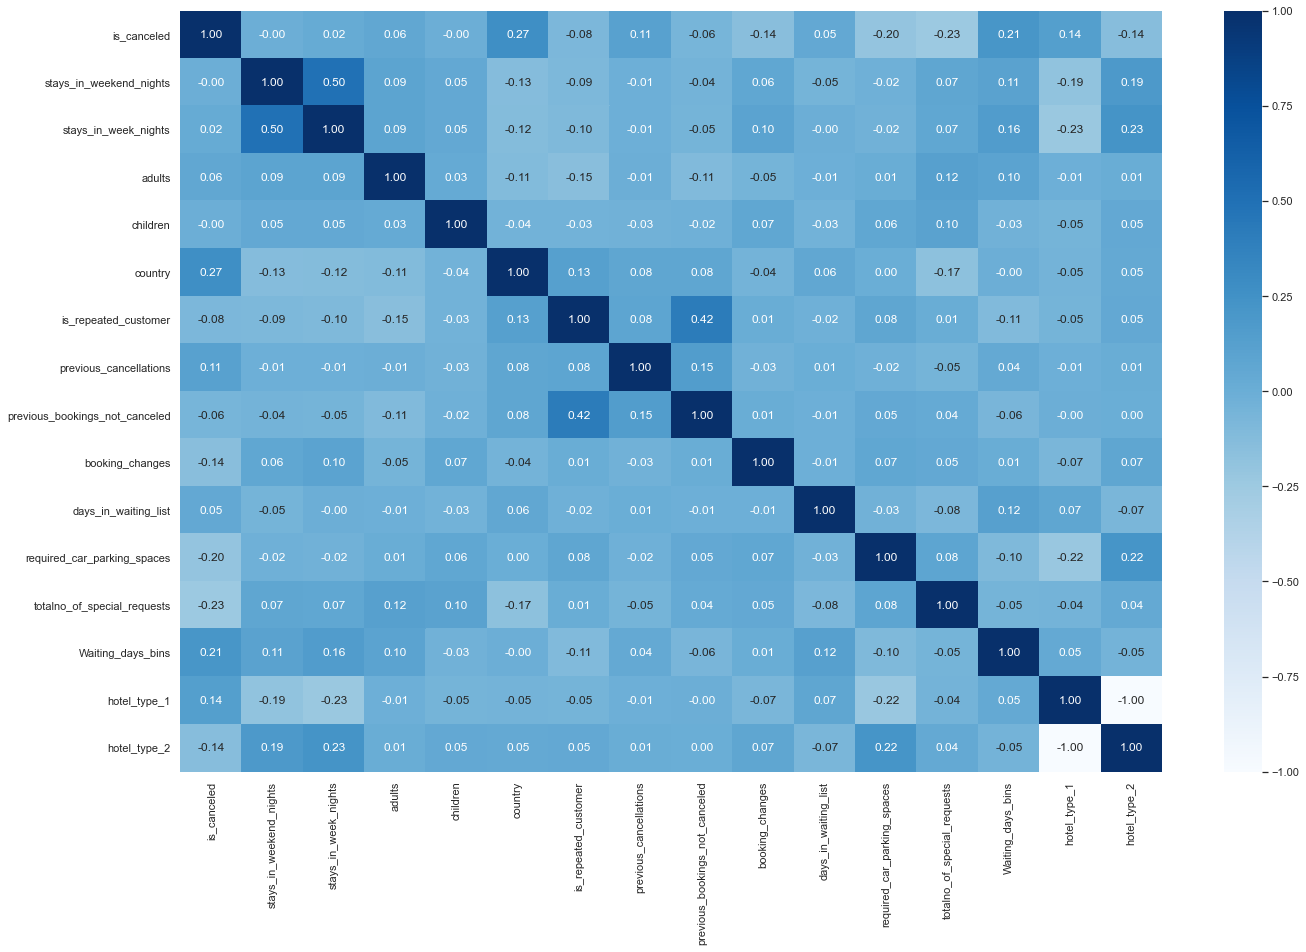

In [62]:
gub = df[['is_canceled','stays_in_weekend_nights','stays_in_week_nights','adults','children','country','is_repeated_customer','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','totalno_of_special_requests','Waiting_days_bins','hotel_type_1','hotel_type_2']]
fig,ax = plt.subplots(figsize = (22,14))
dataplot = sns.heatmap(gub.corr(), cmap = "Blues", annot = True, ax = ax, fmt = '.2f')

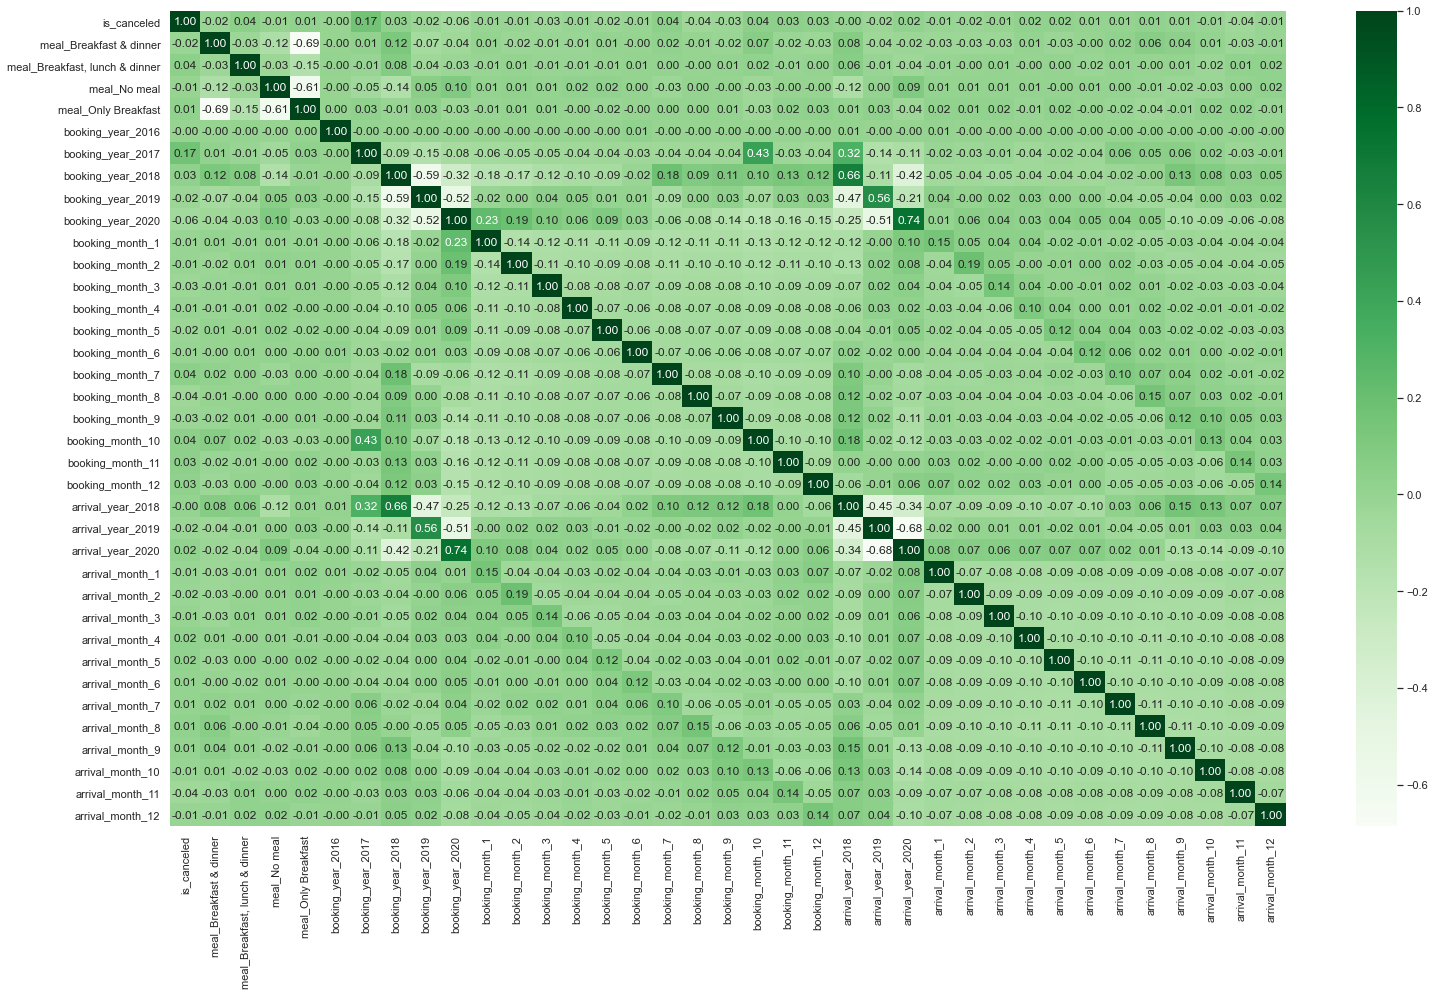

In [369]:
gub = df[['is_canceled','meal_Breakfast & dinner','meal_Breakfast, lunch & dinner','meal_No meal','meal_Only Breakfast','booking_year_2016','booking_year_2017','booking_year_2018','booking_year_2019','booking_year_2020','booking_month_1','booking_month_2','booking_month_3','booking_month_4','booking_month_5','booking_month_6','booking_month_7','booking_month_8','booking_month_9','booking_month_10','booking_month_11','booking_month_12','arrival_year_2018','arrival_year_2019','arrival_year_2020','arrival_month_1','arrival_month_2','arrival_month_3','arrival_month_4','arrival_month_5','arrival_month_6','arrival_month_7','arrival_month_8','arrival_month_9','arrival_month_10','arrival_month_11','arrival_month_12']]
fig,ax = plt.subplots(figsize = (25,15))
dataplot = sns.heatmap(gub.corr(), cmap = "Greens", annot = True, ax = ax, fmt = '.2f')

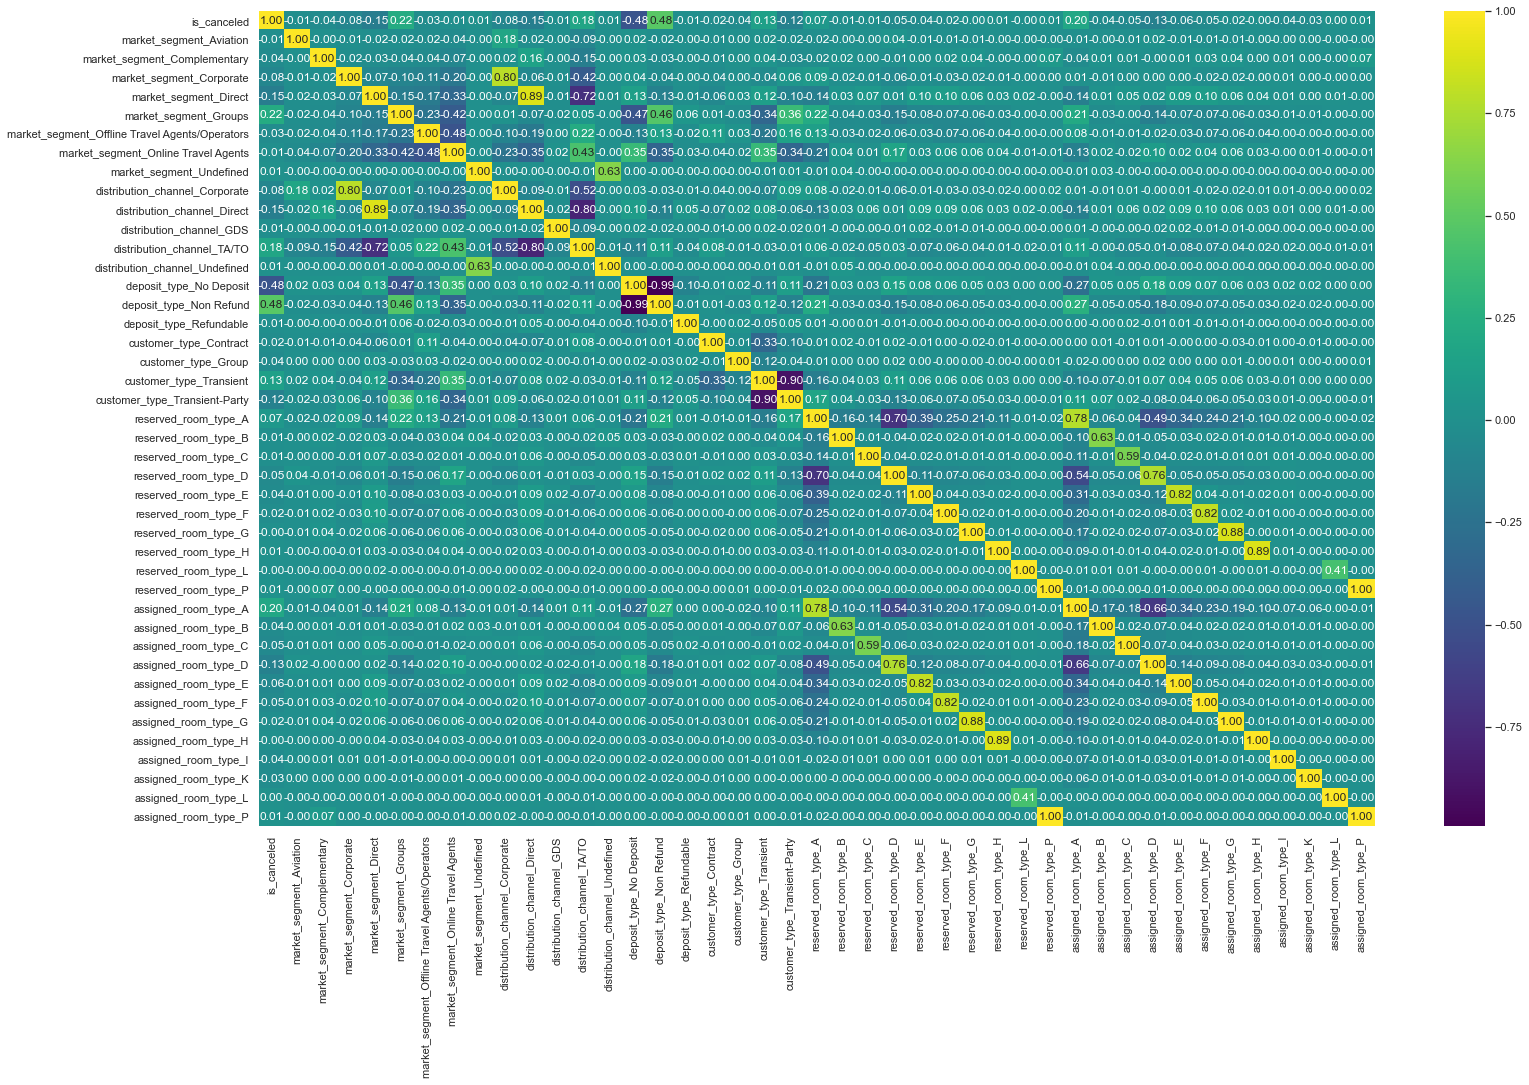

In [353]:
gub = df[['is_canceled','market_segment_Aviation','market_segment_Complementary','market_segment_Corporate','market_segment_Direct','market_segment_Groups','market_segment_Offline Travel Agents/Operators','market_segment_Online Travel Agents','market_segment_Undefined','distribution_channel_Corporate','distribution_channel_Direct','distribution_channel_GDS','distribution_channel_TA/TO','distribution_channel_Undefined','deposit_type_No Deposit','deposit_type_Non Refund','deposit_type_Refundable','customer_type_Contract','customer_type_Group','customer_type_Transient','customer_type_Transient-Party','reserved_room_type_A','reserved_room_type_B','reserved_room_type_C','reserved_room_type_D','reserved_room_type_E','reserved_room_type_F','reserved_room_type_G','reserved_room_type_H','reserved_room_type_L','reserved_room_type_P','assigned_room_type_A','assigned_room_type_B','assigned_room_type_C','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F','assigned_room_type_G','assigned_room_type_H','assigned_room_type_I','assigned_room_type_K','assigned_room_type_L','assigned_room_type_P']]
fig,ax = plt.subplots(figsize = (25,15))
dataplot = sns.heatmap(gub.corr(), cmap = "viridis", annot = True, ax = ax, fmt = '.2f')

#### Train Test Split:

In [83]:
df_treated = df.copy(deep = True)

In [84]:
X = df_treated.drop(['is_canceled'], axis = 1)
y = df_treated['is_canceled']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [87]:
print('The size of the X_train data is ',X_train.shape[0])
print('The size of the y_train data is ', y_train.shape)
print('The size of the X_test data is ', X_test.shape[0])
print('The size of the y_test data is ',y_test.shape)

The size of the X_train data is  83573
The size of the y_train data is  (83573,)
The size of the X_test data is  35817
The size of the y_test data is  (35817,)


#### Scaling:

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
X_scaled = scaler.fit_transform(df_treated.drop(['is_canceled'], axis = 1))

#### Clustering:

#### K-Means clustering method:

In [90]:
from sklearn.cluster import KMeans

In [78]:
wss = []

In [79]:
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(X_scaled)
    wss.append(KM.inertia_)

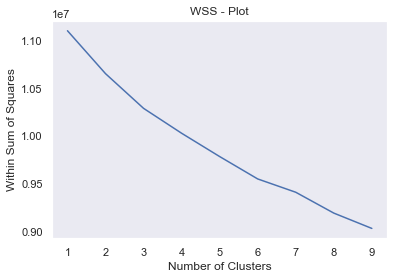

In [82]:
plt.plot(range(1,10),wss)
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.title('WSS - Plot')
plt.show()

#### Silhouette method:

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [92]:
sil = []
kmax = 10

In [93]:
for k in range(2, kmax +1):
    kmeans = KMeans(n_clusters = k).fit(X_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

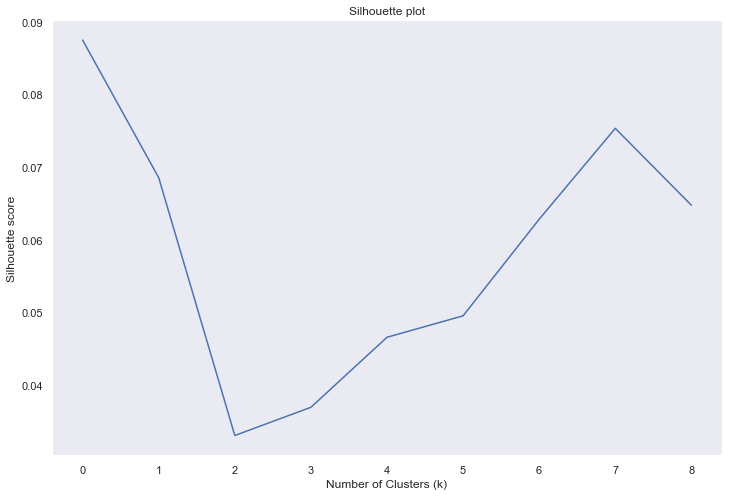

In [94]:
plt.plot(sil)
plt.grid()
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette plot')
plt.show()

In [95]:
k_means7 = KMeans(n_clusters = 7,random_state=1)
k_means7.fit(X_scaled)
k_means7.labels_

array([5, 5, 5, ..., 3, 1, 1])

In [96]:
labels_7 = k_means7.labels_

In [97]:
df_treated['kmeans_clusters'] = labels_7

#### Calculating Variance Inflation Factor (VIF):

In [566]:
B = df_treated.drop(['is_canceled'], axis = 1)

In [567]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(B):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = B.columns
    vif["VIF"] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]

    return(vif)

In [568]:
pd.set_option('display.max_rows', 98)

In [569]:
calc_vif(B).sort_values(by='VIF', ascending = True)

D:\Greatlearning\Ananconda_install\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
8,booking_changes,1.081623
10,required_car_parking_spaces,1.104699
6,previous_cancellations,1.118095
9,days_in_waiting_list,1.146142
2,adults,1.208990
4,country,1.266021
7,previous_bookings_not_canceled,1.299264
11,totalno_of_special_requests,1.301834
5,is_repeated_customer,1.367878
0,stays_in_weekend_nights,1.398609


### Random Forest Classifier:

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(3,10),
    'n_estimators': [200, 500, 1000],
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3, n_jobs = -1)

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': [200, 500, 1000]})

In [65]:
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 1000}

In [66]:
best_grid = grid_search.best_estimator_

#### Predicting on the train and test data:

In [67]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

#### Confusion Matrix

In [68]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

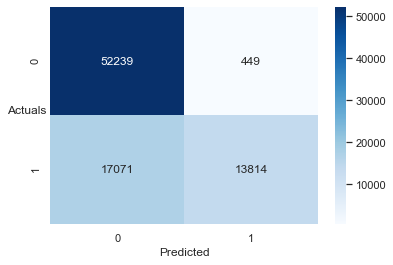

In [69]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

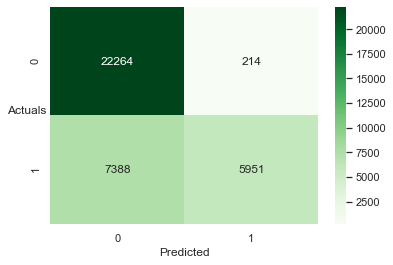

In [70]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification report:

In [71]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86     52688
           1       0.97      0.45      0.61     30885

    accuracy                           0.79     83573
   macro avg       0.86      0.72      0.73     83573
weighted avg       0.83      0.79      0.77     83573



In [67]:
rf_train_accuracy = 0.79
rf_train_precision = 0.97
rf_train_recall = 0.45
rf_train_f1 = 0.61
rf_train_specificity = 0.99
print('rf_train_accuracy ',rf_train_accuracy)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)
print('rf_train_specificity',rf_train_specificity)

rf_train_accuracy  0.79
rf_train_precision  0.97
rf_train_recall  0.45
rf_train_f1  0.61
rf_train_specificity 0.99


In [75]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     22478
           1       0.97      0.45      0.61     13339

    accuracy                           0.79     35817
   macro avg       0.86      0.72      0.73     35817
weighted avg       0.83      0.79      0.76     35817



In [82]:
rf_test_accuracy = 0.79
rf_test_precision = 0.97
rf_test_recall = 0.45
rf_test_f1 = 0.61
rf_test_specificity = 0.99
print('rf_test_accuracy ',rf_test_accuracy)
print('rf_test_precision ',rf_test_precision)
print('rf_test_recall ',rf_test_recall)
print('rf_test_f1 ',rf_test_f1)
print('rf_test_specificity ',rf_test_specificity)

rf_test_accuracy  0.79
rf_test_precision  0.97
rf_test_recall  0.45
rf_test_f1  0.61
rf_test_specificity  0.99


### AUC and ROC for the train and test data:

In [77]:
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.916
AUC for the Test Data: 0.915


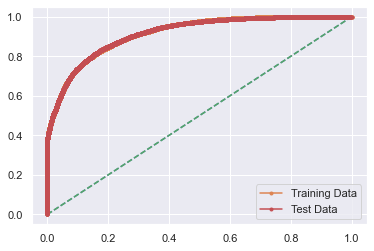

In [78]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [105]:
rf_train_auc = 91.6
rf_test_auc = 91.5

#### Variable Importance:

In [79]:
pd.set_option('display.max_rows', None)

In [80]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                         Imp
deposit_type_Non_Refund                         1.949504e-01
deposit_type_No_Deposit                         1.712347e-01
country                                         9.898025e-02
totalno_of_special_requests                     6.558346e-02
previous_cancellations                          6.318461e-02
market_segment_Online_Travel_Agents             3.670786e-02
required_car_parking_spaces                     3.503368e-02
Waiting_days_bins                               3.159180e-02
market_segment_Groups                           3.075471e-02
customer_type_Transient                         2.498812e-02
booking_changes                                 2.174188e-02
customer_type_Transient_Party                   2.007313e-02
market_segment_Offline_Travel_Agents_Operators  1.924297e-02
distribution_channel_TA/TO                      1.905838e-02
assigned_room_type_A                            1.741994e-02
distribution_channel_Dir

### Decision Tree Classifier:

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1 )

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(0,12),
    'min_samples_leaf': [10, 15, 20, 25],
    'min_samples_split': [30, 45, 60, 75, 90]
}

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [72]:
grid_search.fit(X_train, y_train)

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Greatlearning\Ananconda_install\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(0, 12),
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [30, 45, 60, 75, 90]})

In [73]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [74]:
best_grid = grid_search.best_estimator_

#### Predicting on the Train and Test Data:

In [75]:
pred_train_dt = best_grid.predict(X_train)
pred_test_dt = best_grid.predict(X_test)

#### Confusion matrix:

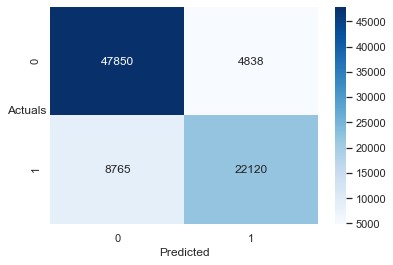

In [78]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_dt)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

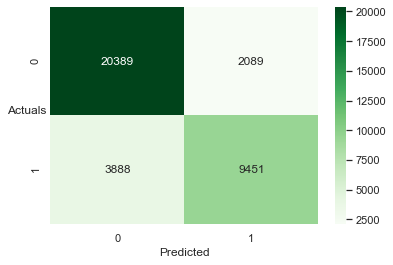

In [79]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_dt)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification report:

In [80]:
print(metrics.classification_report(y_train, pred_train_dt))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     52688
           1       0.82      0.72      0.76     30885

    accuracy                           0.84     83573
   macro avg       0.83      0.81      0.82     83573
weighted avg       0.84      0.84      0.83     83573



In [68]:
dt_train_accuracy = 0.84
dt_train_precision = 0.82
dt_train_recall = 0.72
dt_train_f1 = 0.76
dt_train_specificity = 0.91
print('dt_train_accuracy ',dt_train_accuracy)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)
print('dt_train_specificity', dt_train_specificity)

dt_train_accuracy  0.84
dt_train_precision  0.82
dt_train_recall  0.72
dt_train_f1  0.76
dt_train_specificity 0.91


In [82]:
print(metrics.classification_report(y_test, pred_test_dt))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     22478
           1       0.82      0.71      0.76     13339

    accuracy                           0.83     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.83      0.83     35817



In [69]:
dt_test_accuracy = 0.83
dt_test_precision = 0.82
dt_test_recall = 0.71
dt_test_f1 = 0.76
dt_test_specificity = 0.91
print('dt_test_accuracy ',dt_test_accuracy)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)
print('dt_test_specificity',dt_test_specificity)

dt_test_accuracy  0.83
dt_test_precision  0.82
dt_test_recall  0.71
dt_test_f1  0.76
dt_test_specificity 0.91


### AUC & ROC for the train and test data:

In [99]:
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.916
AUC for the Test Data: 0.914


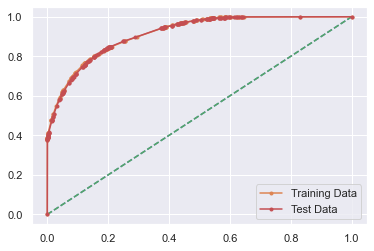

In [100]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [70]:
dt_train_auc = 91.6
dt_test_auc = 91.4

### Logistic regression model:

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression(solver = 'liblinear')

In [103]:
param_grid = {'penalty':['l1','l2'],
             'C':[0.01, 0.1, 1, 10, 100]}

In [104]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

In [105]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [106]:
grid.best_params_

{'C': 100, 'penalty': 'l1'}

In [107]:
best_grid = grid_search.best_estimator_

#### Predicting on train and test data:

In [108]:
pred_train_lr = best_grid.predict(X_train)
pred_test_lr = best_grid.predict(X_test)

#### Confusion Matrix:

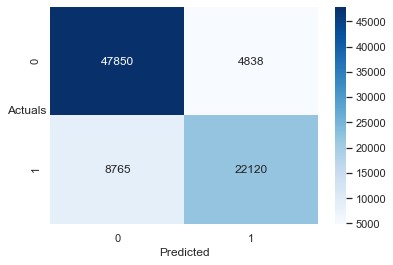

In [109]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lr)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

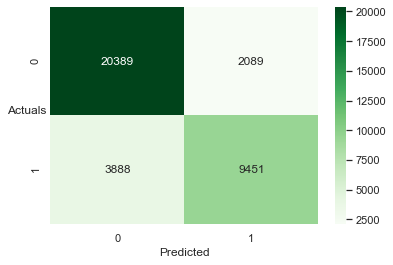

In [110]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lr)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification Report:

In [111]:
print(metrics.classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     52688
           1       0.82      0.72      0.76     30885

    accuracy                           0.84     83573
   macro avg       0.83      0.81      0.82     83573
weighted avg       0.84      0.84      0.83     83573



In [71]:
lr_train_accuracy = 0.84
lr_train_precision = 0.82
lr_train_recall = 0.72
lr_train_f1 = 0.76
lr_train_specificity = 0.91
print('lr_train_accuracy',lr_train_accuracy)
print('lr_train_precision',lr_train_precision)
print('lr_train_recall',lr_train_recall)
print('lr_train_f1',lr_train_f1)
print('lr_train_specificity', lr_train_specificity)

lr_train_accuracy 0.84
lr_train_precision 0.82
lr_train_recall 0.72
lr_train_f1 0.76
lr_train_specificity 0.91


In [98]:
print(metrics.classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     22478
           1       0.82      0.71      0.76     13339

    accuracy                           0.83     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.83      0.83     35817



In [72]:
lr_test_accuracy = 0.83
lr_test_precision = 0.82
lr_test_recall = 0.71
lr_test_f1 = 0.76
lr_test_specificity = 0.91
print('lr_test_accuracy',lr_test_accuracy)
print('lr_test_precision',lr_test_precision)
print('lr_test_recall',lr_test_recall)
print('lr_test_f1',lr_test_f1)
print('lr_test_specificity', lr_test_specificity)

lr_test_accuracy 0.83
lr_test_precision 0.82
lr_test_recall 0.71
lr_test_f1 0.76
lr_test_specificity 0.91


### AUC & ROC for the train and test data:

In [113]:
# Training Data Probability Prediction
pred_prob_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.916
AUC for the Test Data: 0.914


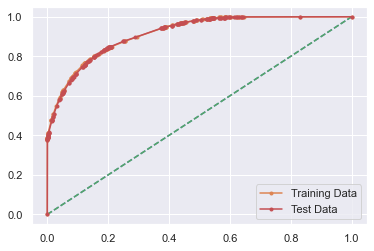

In [115]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [73]:
lr_train_auc = 91.6
lr_test_auc = 91.4

### Random Forest model using Randomized Search CV:

In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=rfc,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

In [122]:
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.0s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   7.7s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 32.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [123]:
# Check best parameters of RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [124]:
pred_train_rs = rs_clf.predict(X_train)
pred_test_rs = rs_clf.predict(X_test)

#### Confusion Matrix:

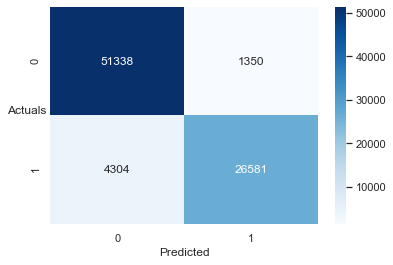

In [125]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rs)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

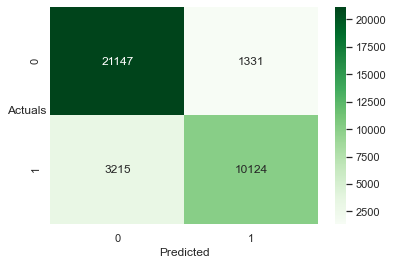

In [126]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rs)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification Report:

In [127]:
print(metrics.classification_report(y_train, pred_train_rs))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52688
           1       0.95      0.86      0.90     30885

    accuracy                           0.93     83573
   macro avg       0.94      0.92      0.93     83573
weighted avg       0.93      0.93      0.93     83573



In [74]:
rs_train_accuracy = 0.93
rs_train_precision = 0.95
rs_train_recall = 0.86
rs_train_f1 = 0.90
rs_train_specificity = 0.97
print('rs_train_accuracy ',rs_train_accuracy)
print ('rs_train_precision ',rs_train_precision)
print ('rs_train_recall ',rs_train_recall)
print ('rs_train_f1 ',rs_train_f1)
print('rs_train_specificity', rs_train_specificity)

rs_train_accuracy  0.93
rs_train_precision  0.95
rs_train_recall  0.86
rs_train_f1  0.9
rs_train_specificity 0.97


In [129]:
print(metrics.classification_report(y_test, pred_test_rs))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22478
           1       0.88      0.76      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.88      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [75]:
rs_test_accuracy = 0.87
rs_test_precision = 0.89
rs_test_recall = 0.76
rs_test_f1 = 0.82
rs_test_specificity = 0.94
print('rs_test_accuracy',rs_test_accuracy)
print('rs_test_precision',rs_test_precision)
print('rs_test_recall',rs_test_recall)
print('rs_test_f1',rs_test_f1)
print('rs_test_specificity', rs_test_specificity)

rs_test_accuracy 0.87
rs_test_precision 0.89
rs_test_recall 0.76
rs_test_f1 0.82
rs_test_specificity 0.94


### AUC & ROC for the train and test data:

In [131]:
# Training Data Probability Prediction
pred_prob_train = rs_clf.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = rs_clf.predict_proba(X_test)

AUC for the Training Data: 0.988
AUC for the Test Data: 0.947


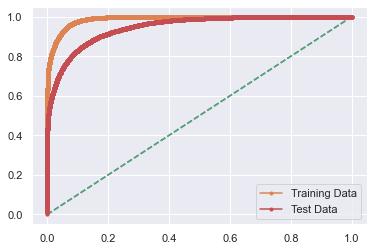

In [132]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [76]:
rs_train_auc = 98.8
rs_test_auc = 94.7

### AdaBoost Classifier:

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
abc = AdaBoostClassifier(n_estimators = 50, base_estimator = dt_model, learning_rate = 1)

In [105]:
model = abc.fit(X_train,y_train)

In [106]:
pred_train_abc = model.predict(X_train)
pred_test_abc = model.predict(X_test)

#### Confusion Matrix:

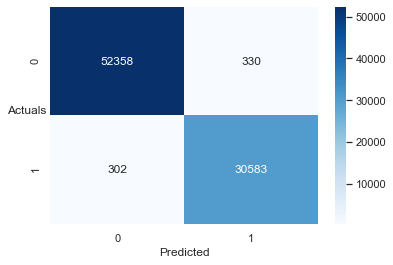

In [107]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_abc)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

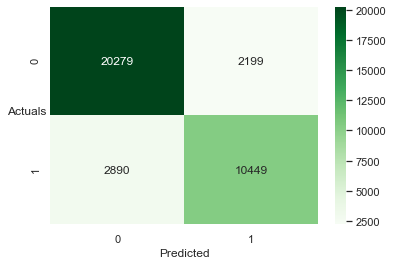

In [108]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_abc)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification Report:

In [109]:
print(metrics.classification_report(y_train, pred_train_abc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52688
           1       0.99      0.99      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



In [77]:
abc_train_accuracy = 0.99
abc_train_precision = 0.99
abc_train_recall = 0.99
abc_train_f1 = 0.99
abc_train_specificity = 0.99
print('abc_train_accuracy',abc_train_accuracy)
print('abc_train_precision',abc_train_precision)
print('abc_train_recall',abc_train_recall)
print('abc_train_f1',abc_train_f1)
print('abc_train_specificity', abc_train_specificity)

abc_train_accuracy 0.99
abc_train_precision 0.99
abc_train_recall 0.99
abc_train_f1 0.99
abc_train_specificity 0.99


In [110]:
print(metrics.classification_report(y_test, pred_test_abc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22478
           1       0.83      0.78      0.80     13339

    accuracy                           0.86     35817
   macro avg       0.85      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817



In [78]:
abc_test_accuracy = 0.86
abc_test_precision = 0.832
abc_test_recall = 0.78
abc_test_f1 = 0.80
abc_test_specificity = 0.90
print('abc_test_accuracy',abc_test_accuracy)
print('abc_test_precision',abc_test_precision)
print('abc_test_recall',abc_test_recall)
print('abc_test_f1',abc_test_f1)
print('abc_test_specificity', abc_test_specificity)

abc_test_accuracy 0.86
abc_test_precision 0.832
abc_test_recall 0.78
abc_test_f1 0.8
abc_test_specificity 0.9


#### AUC & ROC for the train and test data:

In [113]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.915


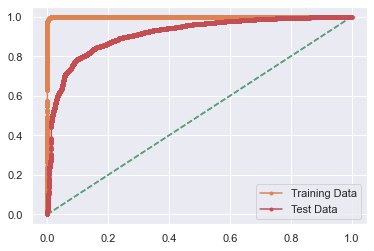

In [114]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [79]:
abc_train_auc = 1.00
abc_test_auc = 0.91

### Gradient Boosting Classifier:

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbcl = GradientBoostingClassifier(random_state=1)
parameters = {
    "n_estimators":[50,250,500],
    "max_depth":[3,5,7,9],
    "learning_rate":[0.01, 0.1]
}
gbcl_cv = GridSearchCV(gbcl, parameters, cv = 3)

In [89]:
gbcl_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 250, 500]})

In [90]:
pred_train_gb = gbcl_cv.predict(X_train)
pred_test_gb = gbcl_cv.predict(X_test)

#### Confusion Matrix:

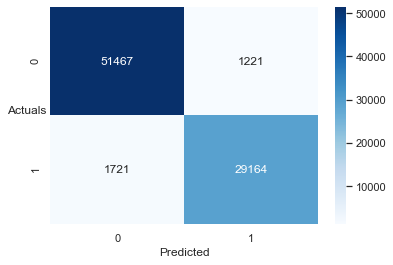

In [91]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_gb)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

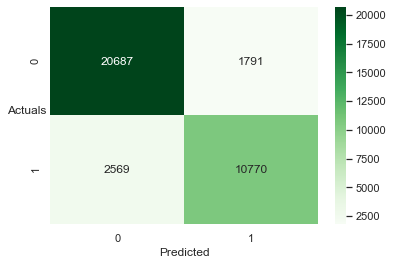

In [92]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_gb)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification Report:

In [93]:
print(metrics.classification_report(y_train, pred_train_gb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     52688
           1       0.96      0.94      0.95     30885

    accuracy                           0.96     83573
   macro avg       0.96      0.96      0.96     83573
weighted avg       0.96      0.96      0.96     83573



In [80]:
gb_train_accuracy = 0.96
gb_train_precision = 0.96
gb_train_recall = 0.94
gb_train_f1 = 0.95
gb_train_specificity = 0.98
print('gb_train_accuracy',gb_train_accuracy)
print('gb_train_precision',gb_train_precision)
print('gb_train_recall',gb_train_recall)
print('gb_train_f1',gb_train_f1)
print('gb_train_specificity', gb_train_specificity)

gb_train_accuracy 0.96
gb_train_precision 0.96
gb_train_recall 0.94
gb_train_f1 0.95
gb_train_specificity 0.98


In [94]:
print(metrics.classification_report(y_test, pred_test_gb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     22478
           1       0.86      0.81      0.83     13339

    accuracy                           0.88     35817
   macro avg       0.87      0.86      0.87     35817
weighted avg       0.88      0.88      0.88     35817



In [81]:
gb_test_accuracy = 0.88
gb_test_precision = 0.86
gb_test_recall = 0.81
gb_test_f1 = 0.83
gb_test_specificity = 0.92
print('gb_test_accuracy',gb_test_accuracy)
print('gb_test_precision',gb_test_precision)
print('gb_test_recall',gb_test_recall)
print('gb_test_f1',gb_test_f1)
print('gb_test_specificity', gb_test_specificity)

gb_test_accuracy 0.88
gb_test_precision 0.86
gb_test_recall 0.81
gb_test_f1 0.83
gb_test_specificity 0.92


#### AUC & ROC for the train and test data:

In [95]:
# Training Data Probability Prediction
pred_prob_train = gbcl_cv.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl_cv.predict_proba(X_test)

AUC for the Training Data: 0.995
AUC for the Test Data: 0.950


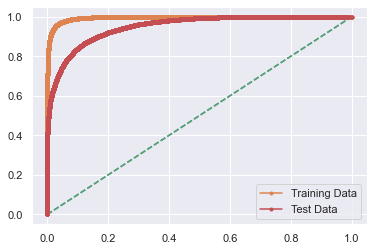

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [82]:
gb_train_auc = 99.5
gb_test_auc = 95.0

### ANN Model:

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [101]:
ann_model = MLPClassifier(hidden_layer_sizes= 9,
                          activation='relu', 
                          alpha=0.1, 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = 300,
                          random_state= 1)

In [102]:
ann_model.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=9, max_iter=300, random_state=1)

In [103]:
pred_train_ann = ann_model.predict(X_train)
pred_test_ann = ann_model.predict(X_test)

#### Confusion Matrix:

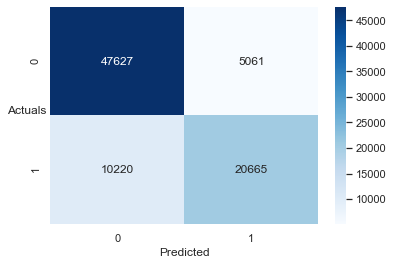

In [104]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_ann)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

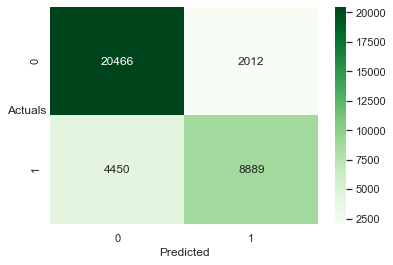

In [105]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_ann)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

#### Classification Report:

In [106]:
print(metrics.classification_report(y_train, pred_train_ann))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     52688
           1       0.80      0.67      0.73     30885

    accuracy                           0.82     83573
   macro avg       0.81      0.79      0.80     83573
weighted avg       0.82      0.82      0.81     83573



In [83]:
ann_train_accuracy = 0.82
ann_train_precision = 0.80
ann_train_recall = 0.67
ann_train_f1 = 0.73
ann_train_specificity = 0.90
print('ann_train_accuracy',ann_train_accuracy)
print('ann_train_precision',ann_train_precision)
print('ann_train_recall',ann_train_recall)
print('ann_train_f1',ann_train_f1)
print('ann_train_specificity', ann_train_specificity)

ann_train_accuracy 0.82
ann_train_precision 0.8
ann_train_recall 0.67
ann_train_f1 0.73
ann_train_specificity 0.9


In [107]:
print(metrics.classification_report(y_test, pred_test_ann))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22478
           1       0.82      0.67      0.73     13339

    accuracy                           0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.82     35817



In [84]:
ann_test_accuracy = 0.82
ann_test_precision = 0.82
ann_test_recall = 0.67
ann_test_f1 = 0.73
ann_test_specificity = 0.91
print('ann_test_accuracy',ann_test_accuracy)
print('ann_test_precision',ann_test_precision)
print('ann_test_recall',ann_test_recall)
print('ann_test_f1',ann_test_f1)
print('ann_test_specificity', ann_test_specificity)

ann_test_accuracy 0.82
ann_test_precision 0.82
ann_test_recall 0.67
ann_test_f1 0.73
ann_test_specificity 0.91


#### AUC & ROC for the train and test data:

In [110]:
# Training Data Probability Prediction
pred_prob_train = ann_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ann_model.predict_proba(X_test)

AUC for the Training Data: 0.897
AUC for the Test Data: 0.899


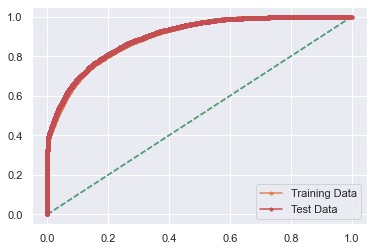

In [111]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
ann_train_auc = 89.7
ann_test_auc = 89.9

### Comparison of performance metrics of all the models:

In [88]:
index=['Accuracy', 'AUC', 'Recall','Precision','Specificity']
data = pd.DataFrame({'RF Randomized search Train':[rs_train_accuracy,rs_train_auc,rs_train_recall,rs_train_precision,rs_train_specificity],
        'RF Randomized search Test':[rs_test_accuracy,rs_test_auc,rs_test_recall,rs_test_precision,rs_test_specificity],
       'Decision Tree Train':[dt_train_accuracy,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_specificity],
        'Decision Tree Test':[dt_test_accuracy,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_specificity],
         'Logistic Regression Train':[lr_train_accuracy,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_specificity],
         'Logistic Regression Test':[lr_test_accuracy,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_specificity],
                    'ADA Boosting Train':[abc_train_accuracy,abc_train_auc,abc_train_recall,abc_train_precision,abc_train_specificity],
                    'ADA Boosting Test':[abc_test_accuracy,abc_test_auc,abc_test_recall,abc_test_precision,abc_test_specificity],
                    'Gradient Boosting Train':[gb_train_accuracy,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_specificity],
                    'Gradient Boosting Test':[gb_test_accuracy,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_specificity],
                    'ANN Train':[ann_train_accuracy,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_specificity],
                    'ANN Test':[ann_test_accuracy,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_specificity]},index=index)


In [89]:
data

,RF Randomized search Train,RF Randomized search Test,Decision Tree Train,Decision Tree Test,Logistic Regression Train,Logistic Regression Test,ADA Boosting Train,ADA Boosting Test,Gradient Boosting Train,Gradient Boosting Test,ANN Train,ANN Test
Accuracy,0.93,0.87,0.84,0.83,0.84,0.83,0.99,0.860,0.96,0.88,0.82,0.82
AUC,98.80,94.70,91.60,91.40,91.60,91.40,1.00,0.910,99.50,95.00,89.70,89.90
Recall,0.86,0.76,0.72,0.71,0.72,0.71,0.99,0.780,0.94,0.81,0.67,0.67
Precision,0.95,0.89,0.82,0.82,0.82,0.82,0.99,0.832,0.96,0.86,0.80,0.82
Specificity,0.97,0.94,0.91,0.91,0.91,0.91,0.99,0.900,0.98,0.92,0.90,0.91


In [90]:
### Looking at only the test data: 

In [91]:
index=['Accuracy', 'AUC', 'Recall','Precision','Specificity']
data2 = pd.DataFrame({'RF Randomized search Test':[rs_test_accuracy,rs_test_auc,rs_test_recall,rs_test_precision,rs_test_specificity],
         'Decision Tree Test':[dt_test_accuracy,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_specificity],
         'Logistic Regression Test':[lr_test_accuracy,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_specificity],
                    'ADA Boosting Test':[abc_test_accuracy,abc_test_auc,abc_test_recall,abc_test_precision,abc_test_specificity],
                    'Gradient Boosting Test':[gb_test_accuracy,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_specificity],
                    'ANN Test':[ann_test_accuracy,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_specificity]},index=index)

In [92]:
data2

,RF Randomized search Test,Decision Tree Test,Logistic Regression Test,ADA Boosting Test,Gradient Boosting Test,ANN Test
Accuracy,0.87,0.83,0.83,0.860,0.88,0.82
AUC,94.70,91.40,91.40,0.910,95.00,89.90
Recall,0.76,0.71,0.71,0.780,0.81,0.67
Precision,0.89,0.82,0.82,0.832,0.86,0.82
Specificity,0.94,0.91,0.91,0.900,0.92,0.91
